# Description

This notebook looks at the raspberry pi data generated and experiments with different ways of generating synthetic data. It first notes that the data is in an embedded JSON file and retrieves the **'unmodelled data'** describing the objects viewed by the raspberry and its camera. It uses models in the SDV library to compare their performance on the data. Afterwards adds the timestamp present in the parent layer or the json embedding and looks at how the models generate it. Finally it looks at a way to handle the telemetric data which occurs when 2 objects are viewed by the sensors in one message. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Takeaways</a></span><ul class="toc-item"><li><span><a href="#Important-next-steps" data-toc-modified-id="Important-next-steps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Important next steps</a></span></li></ul></li><li><span><a href="#Telemetric-Data-Generation" data-toc-modified-id="Telemetric-Data-Generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Telemetric Data Generation<a class="anchor" id="telemetric"></a></a></span><ul class="toc-item"><li><span><a href="#Imports-and-dataset-loading-" data-toc-modified-id="Imports-and-dataset-loading--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Imports and dataset loading <a class="anchor" id="imports"></a></a></span></li><li><span><a href="#Manual-Generation-" data-toc-modified-id="Manual-Generation--4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Manual Generation <a class="anchor" id="manual"></a></a></span><ul class="toc-item"><li><span><a href="#Data-Types--" data-toc-modified-id="Data-Types---4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Data Types  <a class="anchor" id="types"></a></a></span><ul class="toc-item"><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Useful functions</a></span></li><li><span><a href="#Sensor-generation-" data-toc-modified-id="Sensor-generation--4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>Sensor generation <a class="anchor" id="sensor"></a></a></span></li><li><span><a href="#Video-boxes-Generation-" data-toc-modified-id="Video-boxes-Generation--4.2.1.3"><span class="toc-item-num">4.2.1.3&nbsp;&nbsp;</span>Video boxes Generation <a class="anchor" id="boxes"></a></a></span></li><li><span><a href="#Class-Generation-" data-toc-modified-id="Class-Generation--4.2.1.4"><span class="toc-item-num">4.2.1.4&nbsp;&nbsp;</span>Class Generation <a class="anchor" id="class"></a></a></span></li><li><span><a href="#Score-Generation-" data-toc-modified-id="Score-Generation--4.2.1.5"><span class="toc-item-num">4.2.1.5&nbsp;&nbsp;</span>Score Generation <a class="anchor" id="score"></a></a></span></li><li><span><a href="#Combined-generation" data-toc-modified-id="Combined-generation-4.2.1.6"><span class="toc-item-num">4.2.1.6&nbsp;&nbsp;</span>Combined generation</a></span></li></ul></li><li><span><a href="#Evaluation-" data-toc-modified-id="Evaluation--4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Evaluation <a class="anchor" id="eval"></a></a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li><li><span><a href="#SDV-Generation-of-Unmodelled-Data-" data-toc-modified-id="SDV-Generation-of-Unmodelled-Data--4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>SDV Generation of Unmodelled Data <a class="anchor" id="sdv"></a></a></span><ul class="toc-item"><li><span><a href="#Loading-data-set" data-toc-modified-id="Loading-data-set-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Loading data set<a class="anchor" id="load"></a></a></span></li><li><span><a href="#Fitting-" data-toc-modified-id="Fitting--4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Fitting <a class="anchor" id="fitting"></a></a></span><ul class="toc-item"><li><span><a href="#GaussianCopula-" data-toc-modified-id="GaussianCopula--4.3.2.1"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>GaussianCopula <a class="anchor" id="gaussian_fit"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--4.3.2.2"><span class="toc-item-num">4.3.2.2&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="ctgan_fit"></a></a></span></li><li><span><a href="#Copula-" data-toc-modified-id="Copula--4.3.2.3"><span class="toc-item-num">4.3.2.3&nbsp;&nbsp;</span>Copula <a class="anchor" id="copula_fit"></a></a></span></li><li><span><a href="#TVAE" data-toc-modified-id="TVAE-4.3.2.4"><span class="toc-item-num">4.3.2.4&nbsp;&nbsp;</span>TVAE<a class="anchor" id="tvae_fit"></a></a></span></li></ul></li><li><span><a href="#Evaluation-" data-toc-modified-id="Evaluation--4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Evaluation <a class="anchor" id="eval2"></a></a></span><ul class="toc-item"><li><span><a href="#Gaussian-" data-toc-modified-id="Gaussian--4.3.3.1"><span class="toc-item-num">4.3.3.1&nbsp;&nbsp;</span>Gaussian <a class="anchor" id="guassian_eval"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--4.3.3.2"><span class="toc-item-num">4.3.3.2&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="ctgan_eval"></a></a></span></li><li><span><a href="#Copula-" data-toc-modified-id="Copula--4.3.3.3"><span class="toc-item-num">4.3.3.3&nbsp;&nbsp;</span>Copula <a class="anchor" id="copula_eval"></a></a></span></li><li><span><a href="#TVAE-" data-toc-modified-id="TVAE--4.3.3.4"><span class="toc-item-num">4.3.3.4&nbsp;&nbsp;</span>TVAE <a class="anchor" id="tvae_eval"></a></a></span></li></ul></li><li><span><a href="#Formatting-and-saving-" data-toc-modified-id="Formatting-and-saving--4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Formatting and saving <a class="anchor" id="format"></a></a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-4.3.4.1"><span class="toc-item-num">4.3.4.1&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#CTGAN" data-toc-modified-id="CTGAN-4.3.4.2"><span class="toc-item-num">4.3.4.2&nbsp;&nbsp;</span>CTGAN</a></span></li><li><span><a href="#copula" data-toc-modified-id="copula-4.3.4.3"><span class="toc-item-num">4.3.4.3&nbsp;&nbsp;</span>copula</a></span></li><li><span><a href="#TVAE" data-toc-modified-id="TVAE-4.3.4.4"><span class="toc-item-num">4.3.4.4&nbsp;&nbsp;</span>TVAE</a></span></li></ul></li></ul></li><li><span><a href="#SDV-Generation-of-Timestamps" data-toc-modified-id="SDV-Generation-of-Timestamps-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>SDV Generation of Timestamps</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Fitting-and-Evaluating" data-toc-modified-id="Fitting-and-Evaluating-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Fitting and Evaluating</a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-4.4.2.1"><span class="toc-item-num">4.4.2.1&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#CTGAN" data-toc-modified-id="CTGAN-4.4.2.2"><span class="toc-item-num">4.4.2.2&nbsp;&nbsp;</span>CTGAN</a></span></li><li><span><a href="#Copula-GAN" data-toc-modified-id="Copula-GAN-4.4.2.3"><span class="toc-item-num">4.4.2.3&nbsp;&nbsp;</span>Copula GAN</a></span></li><li><span><a href="#TVAE" data-toc-modified-id="TVAE-4.4.2.4"><span class="toc-item-num">4.4.2.4&nbsp;&nbsp;</span>TVAE</a></span></li></ul></li><li><span><a href="#Visualizing-data" data-toc-modified-id="Visualizing-data-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Visualizing data</a></span><ul class="toc-item"><li><span><a href="#x-and-y-values" data-toc-modified-id="x-and-y-values-4.4.3.1"><span class="toc-item-num">4.4.3.1&nbsp;&nbsp;</span>x and y values</a></span></li><li><span><a href="#Timestamps" data-toc-modified-id="Timestamps-4.4.3.2"><span class="toc-item-num">4.4.3.2&nbsp;&nbsp;</span>Timestamps</a></span></li></ul></li><li><span><a href="#Timeseries-Par-Model" data-toc-modified-id="Timeseries-Par-Model-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Timeseries Par Model</a></span></li></ul></li></ul></li><li><span><a href="#Generating-the-entire-dataset-at-once" data-toc-modified-id="Generating-the-entire-dataset-at-once-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generating the entire dataset at once</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-boxes" data-toc-modified-id="Handling-boxes-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Handling boxes</a></span><ul class="toc-item"><li><span><a href="#Seperating-messages" data-toc-modified-id="Seperating-messages-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Seperating messages</a></span></li><li><span><a href="#Flattening-messages" data-toc-modified-id="Flattening-messages-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>Flattening messages</a></span></li></ul></li><li><span><a href="#Unformatting" data-toc-modified-id="Unformatting-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Unformatting</a></span></li></ul></li><li><span><a href="#Fitting-and-evaluating-for-seperated-messages" data-toc-modified-id="Fitting-and-evaluating-for-seperated-messages-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting and evaluating for seperated messages</a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#TVAE" data-toc-modified-id="TVAE-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>TVAE</a></span></li></ul></li><li><span><a href="#Fitting-and-evaluating-for-flattened-messages" data-toc-modified-id="Fitting-and-evaluating-for-flattened-messages-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Fitting and evaluating for flattened messages</a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#TVAE" data-toc-modified-id="TVAE-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>TVAE</a></span></li></ul></li><li><span><a href="#Visualizing" data-toc-modified-id="Visualizing-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Visualizing</a></span><ul class="toc-item"><li><span><a href="#Timestamp-Distribution" data-toc-modified-id="Timestamp-Distribution-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Timestamp Distribution</a></span></li><li><span><a href="#Box-Coords" data-toc-modified-id="Box-Coords-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Box Coords</a></span></li></ul></li><li><span><a href="#Reformatting" data-toc-modified-id="Reformatting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Reformatting</a></span></li></ul></li></ul></div>

# Summary 

Visualization of data is very much needed throughout for comprehension but also cluters the notebook so is currently only included in section 3.4. 

**Section 4.2** explores the manual generation of the telemetric data. It creates functions to randomize (extended in _JSON generator_ notebook) and a function to format and unformat boxes as the telemetric data has the boxes in the from of a string (was the first approach but could easily be done putting the input as a list then making columns out of the list). It evaluates the generated data and has an overall score of 0.53. 

**Section 4.3** explores the use of the SDV library with the unmodelled data in the telemetric dataset. I fit the different models described in te GAN notebook with constraints and transformers and the evaluations of the generated data had overall scores of 0.64, 0.50, 0.60 and 0.54 for the models scoring higher in most metrics than the manual optimization. **Note** Detection metrics score very differently depending on the 'between' constraint being use. The scores afore mentioned are when this constraint is not applied at all. 

**Section 4.4** implements the same models including the timestamp column. Evaluation results in similar results with the TVAE model identifying the patterns in the data better but the Gaussian Copula identifying the timestamp pattern better. Important to note, the timestamp data generated does not extend the data to future dates, instead it models the data and generates x amount of that data on the same distribution of time as the original dataset time frame. I also briefly implements SDV's PAR model which is used for time series specifically with the ability to choose which model the underlying data is generated with. This needs to be further looked in to as currently evaluation is the same and I was not able to haev the model extend to future timestamps repeating the pattern, it only stretched it. 

_The next chapter should likely be its own notebook_

**Chapter 5** Tries to generate the entire iothub dataset on level one instead of just the embedded unmodelled data level. This dataset has 2 boxes for each message and I look at both flattening the messages keeping both boxes on one row, and exploding the message seperating the boxes in rows with duplicated information. Evaluation for these models clearly shows generation of the currently not active parts of the data (PartitionId and empty IoTHub message) hinders the model a lot. Every box in the message requires its own list of constraints, writting a function to create these might be essential if considering more than 2 boxes.

# Takeaways

TVAE model seems to work the best on the box data, GaussianCopula seems best for timestamp distributions.

**_Steps to implement on any data set:_** (same as for all SDV models)
* **Import** the models and **load** the dataset
* Understand and establish the fields of the dataset and **set field transformer and constraints** if neccessary
* **Initialize** model with constraints
* **Train/fit** model on real data
* **Sample/Generate** new data

**Boxes** come as string and values need to be seperated to generate properly then reformated as before afterwards. Because this is the case, there are two ways of generating messages where two boxes are observed: 
* Using _pd.explode()_ and treating **each box as a different message** just with the same timestamp then **merging the box cell back** together. The generated messages have timestamps based on a distribution so they will not generate any messages with the same timestamp. This means we will have to **choose which ones to merge** in which case we could've just ignored the time stamps in the first place. This also does not carry forward any information on the **link between the two boxes** (maybe the laptop being seen in the same box as the chair should happen more often) this would be randomized or manual.
* **Expanding** out the boxes **for each message** then having a set of columns for each box. This would work best if the **number of boxes in each message is fixed**. It ensures the link between there being a laptop and chair together is mapped in some way but also has the adverse affect of the x and y values of box2 affecting the mapping of box1. Furthermore if messages do not have the same amount of boxes, this expansion is more likely to confuse the model than anything else. 

**Note** A solution to dealing with any number of boxes would be using a relational table model such as the HMA1 model from SDV which would best deal with all these issues if it works. It seems like a new addition to SDV and not fully developped but worth a try with more complete datasets.

Models can learn **timestamp** distributions, but the generated data, whether is is 10 or 10 000, will be using that **exact same distribution**. For example, if the data spans over 5 minutes at noon on the 27/07/2021, the generated data will have the same distribution on those 5 minutes at noon on the 27/07/2021. This can be useful though: 
* If we have 1000 points of **data spanning one day**, and the goal is to have an **entire month** with each day having x amount of data with that same distribution on the day; we can use a for loop to have the data generate x samples **offsetting them by one day** more each time and **concatenating** all the dataframes generated. In this case the data can also be analysed all at once and does not need a raspberry pi to run throughout the day.
* If we **do not** have such an initial dataset which spans over any usable length of time, ie. one only spanning over 5 minutes, and the raspberry pi is intending to **analyse the data throughout the day** we can do this differently. We can train the model to **generate just the data** ignoring the timestamps, and throughout the day have the raspberry **call the models** to generate 1 (or however many require) sample of data **at the frequency desired** and have the raspberry generate the timestamps. The raspberry can also simultaneously analyse the data (using a slicing/sliding window if desried).

**New addition to SDV 30/07/2021** Between constraint now works on timestamps too so could use the between constraint with the transform startegy in order to have time stamps for desired period with distribution of the data!!!

In general; the GANs models are machine learning models like any other, they require some rich data to be able to generate more. When distribtuions are not clear enough, values of the generated data can seem very odd.


## Important next steps

* Understanding of PAR model by SDV for timeseries data to recreated timeseries patterns on multiple occasions
* Learn about HMA1 relational table model 

# Telemetric Data Generation<a class="anchor" id="telemetric"></a>

## Imports and dataset loading <a class="anchor" id="imports"></a>

In [367]:
import json
import yapf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import gamma

from sdv.evaluation import evaluate
from sdv.tabular import GaussianCopula, CTGAN, CopulaGAN, TVAE
from sdv.metrics.tabular import (CSTest, KSTest, BNLikelihood, BNLogLikelihood,
                                 GMLogLikelihood, LogisticDetection,
                                 SVCDetection,
                                 MulticlassDecisionTreeClassifier, NumericalLR)
from sdv.constraints import GreaterThan

import warnings

warnings.filterwarnings('ignore')

Reading in json file

In [368]:
dftele = pd.read_json('./data/telemetricData.txt')
dftele.head()

,_unmodeleddata,_eventtype,_timestamp,EventProcessedUtcTime,PartitionId,EventEnqueuedUtcTime,IoTHub
0,"{'sensors': {'__t': 'c', 'video': {'boxes': '[...",Telemetry,"07/13/2021, 12:11:38.276897",2021-07-13T10:29:45.6624141Z,0,2021-07-13T10:07:08.1210000Z,"{'MessageId': None, 'CorrelationId': None, 'Co..."
1,"{'sensors': {'__t': 'c', 'video': {'boxes': '[...",Telemetry,"07/13/2021, 12:11:38.180751",2021-07-13T10:29:45.6624141Z,0,2021-07-13T10:07:08.1210000Z,"{'MessageId': None, 'CorrelationId': None, 'Co..."
2,"{'sensors': {'__t': 'c', 'video': {'boxes': '[...",Telemetry,"07/13/2021, 12:11:38.101000",2021-07-13T10:29:45.6624141Z,0,2021-07-13T10:07:07.8870000Z,"{'MessageId': None, 'CorrelationId': None, 'Co..."
3,"{'sensors': {'__t': 'c', 'video': {'boxes': '[...",Telemetry,"07/13/2021, 12:11:27.711856",2021-07-13T10:29:45.6624141Z,0,2021-07-13T10:06:57.5880000Z,"{'MessageId': None, 'CorrelationId': None, 'Co..."
4,"{'sensors': {'__t': 'c', 'video': {'boxes': '[...",Telemetry,"07/13/2021, 12:11:27.647747",2021-07-13T10:29:44.6613294Z,0,2021-07-13T10:06:57.4780000Z,"{'MessageId': None, 'CorrelationId': None, 'Co..."


The json objects in this file are nested for the _unmodeleddata_ and _IoTHub_ objects which therefore need to be normalized to be accessed. 

In [369]:
# accessing embedded data
dfunmod = pd.json_normalize(dftele['_unmodeleddata'])
dfunmod.head()

,sensors.__t,sensors.video.boxes,sensors.video.classes,sensors.video.scores
0,c,"[0.4961545169353485, 0.7034689784049988, 0.985...",tv,0.5625
1,c,"[0.3772980570793152, 0.043439388275146484, 0.6...",person,0.64453125
2,c,"[0.5733964443206787, -0.01097947359085083, 0.9...",couch,0.66796875
3,c,"[0.4685651361942291, 0.46356216073036194, 0.61...",chair,0.51171875
4,c,"[0.4961545169353485, 0.7054068446159363, 0.985...",tv,0.57421875


In [370]:
# accessing embedded data
dfiot = pd.json_normalize(dftele['IoTHub'])
dfiot.head()

,MessageId,CorrelationId,ConnectionDeviceId,ConnectionDeviceGenerationId,EnqueuedTime,StreamId
0,None,None,iotedge-aidemo-dev-westeu-001,637607268247344024,2021-07-13T10:07:08.0430000Z,None
1,None,None,iotedge-aidemo-dev-westeu-001,637607268247344024,2021-07-13T10:07:07.9650000Z,None
2,None,None,iotedge-aidemo-dev-westeu-001,637607268247344024,2021-07-13T10:07:07.8710000Z,None
3,None,None,iotedge-aidemo-dev-westeu-001,637607268247344024,2021-07-13T10:06:57.5100000Z,None
4,None,None,iotedge-aidemo-dev-westeu-001,637607268247344024,2021-07-13T10:06:57.4160000Z,None


## Manual Generation <a class="anchor" id="manual"></a>

To generate the whole object, it seems easier to start off by generating the _unmodeleddata_ seperately to the other data types.

### Data Types  <a class="anchor" id="types"></a>

This object has 4 values which need ot be generated: 

* **Sensor type** which indicates the type of sensor used labeled by a one letter abbrevation; currently c for camera. String value.

* **Video boxes** which indicates the 4 number coordinates of the object perceived on the camera each one between 0-1. 4 floats between 0-1 parsed into a String. 

* **Classes** which indicates the physical object the sensor has detected. String value.

* **Scores** which indicates the score for the model having identified the physical object. Float between 0 and 1.

#### Useful functions

In [371]:
def randomizer(data, distribution, size):
    # Quick randomizing function made for customisation purposes; improved version present in JSON generator file
    if (distribution == 'Uniform'):
        print('Input quartile percentage for a:')
        a = input()
        print('Input quartile percentage for b:')
        b = input()
        new_data = np.random.uniform(data.quantile(a), data.quantile(b), size)

    elif (distribution == 'Normal'):
        new_data = np.random.normal(data.mean(), data.std(), size)

    elif (distribution == 'Gamma'):
        print('Input shape parameter:')
        a = input()
        fig, ax = plt.subplots(1, 1)
        new_data = gamma.rvs(a, size)

    elif (distribution == 'Exponential'):
        print('Input rate parameter:')
        a = input()
        new_data = np.random.exponential(a, size)

    return new_data

In [372]:
def FakeBoxes(size):
    #Function used to format the boxes feature into similar format to original
    temp = []
    x1_coords = randomizer(box.x1, 'Normal', size)
    y1_coords = randomizer(box.y1, 'Normal', size)
    x2_coords = randomizer(box.x2, 'Normal', size)
    y2_coords = randomizer(box.y2, 'Normal', size)
    for i in range(len(x1_coords)):
        temp.append('[' + str(x1_coords[i]) + ', ' + str(y1_coords[i]) + ', ' +
                    str(x2_coords[i]) + ', ' + str(y2_coords[i]) + ']')
    return temp

#### Sensor generation <a class="anchor" id="sensor"></a>

There is currently only one value, c, however, it might be useful to have a systematic way of gathering the dictionary with its ditribution to plug into a function in the future

In [373]:
types = np.array(dfunmod['sensors.__t'].value_counts(normalize=True).keys())
type_dist = np.array(dfunmod['sensors.__t'].value_counts(normalize=True))

In [374]:
new_types = np.random.choice(types, size=50, p=type_dist)

#### Video boxes Generation <a class="anchor" id="boxes"></a>
Change data from string to floats and seperate each coordinate with a column. For each coordinate use randomizer with normal distribution to generate new data. 

**Potential issue** this randomizes the coordinates independently meaning it may put bottom left corner of the box above the top right corner. Hopefully current normal distribution will keep boxes in logical coordinates without relational randomization

In [375]:
box = pd.DataFrame()
boxes = dfunmod[['sensors.video.boxes']]
box[['x1', 'y1', 'x2',
     'y2']] = boxes['sensors.video.boxes'].str.split(',', expand=True)
box['x1'] = box['x1'].map(lambda x: x.lstrip('['))
box['y2'] = box['y2'].map(lambda x: x.rstrip(']'))
box['x1'] = box.x1.astype(float)
box['y1'] = box.y1.astype(float)
box['x2'] = box.x2.astype(float)
box['y2'] = box.y2.astype(float)
# Simplified into FakeBoxes function above

#### Class Generation <a class="anchor" id="class"></a>
Could very simply be made into a function for categorical data if need be.

In [376]:
classes = np.array(
    dfunmod['sensors.video.classes'].value_counts(normalize=True).keys())
class_dist = np.array(
    dfunmod['sensors.video.classes'].value_counts(normalize=True))

In [377]:
new_classes = np.random.choice(classes, size=50, p=class_dist)

#### Score Generation <a class="anchor" id="score"></a>
There are different distribution which can be chosen: 
* **Uniform Distribution**: The probability distribution function of the continuous uniform distribution requires a min and max, a and b.
* **Normal Distribution**: Normal Distribution, also known as Gaussian distribution, has a bell-shaped density curve described by its mean μ and standard deviation σ. 
* **Gamma Distribution**: a two-parameter family of continuous probability distributions, parameterized in terms of a shape parameter α=k and an inverse scale parameter β=1/θ, called a rate parameter. Requires a single integer argument but can add rate aswell.
* **Exponential Distribution**: The exponential distribution describes the time between events in a Poisson point process. requires scale argument (1/lamda).

In [378]:
scores = pd.DataFrame()
scores[['score']] = dfunmod[['sensors.video.scores']].astype(float)
scores.head()

,score
0,0.562500
1,0.644531
2,0.667969
3,0.511719
4,0.574219


#### Combined generation
Putting Everything together we get this new data:

In [379]:
fake_types = np.random.choice(types, size=100, p=type_dist)
fake_boxes = FakeBoxes(100)
fake_classes = np.random.choice(classes, size=100, p=class_dist)
fake_scores = randomizer(scores.score, 'Normal', 100)
fake_data = {
    'sensors.__t': fake_types,
    'sensors.video.boxes': fake_boxes,
    'sensors.video.classes': fake_classes,
    'sensors.video.scores': fake_scores
}
fake_unmod = pd.DataFrame(fake_data)

In [380]:
fake_unmod.head()

,sensors.__t,sensors.video.boxes,sensors.video.classes,sensors.video.scores
0,c,"[0.44489075652033905, 0.17513039140779563, 1.0...",couch,0.639630
1,c,"[0.5681330837210461, 0.18068780463610773, 0.83...",chair,0.574751
2,c,"[0.5666229291091176, 0.3321287831866776, 0.944...",person,0.490153
3,c,"[0.5503405580608813, 0.3909240732575636, 0.943...",tv,0.605555
4,c,"[0.4570184306514555, 0.31824026771058234, 0.56...",tv,0.660697


In [381]:
dfunmod['sensors.video.scores'] = dfunmod['sensors.video.scores'].astype(float)

### Evaluation <a class="anchor" id="eval"></a>
Evaluation of the box feature is not the most accurate as instead of analysing the 4 coordinates, in this format it identifies how similar the strings are. This is fixed during the evaluation of the SDV library by evaluating before reformating.

In [382]:
evaluate(dfunmod, fake_unmod)

0.4605591205832278

In [383]:
evaluate(dfunmod, fake_unmod, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-inf,0.000000,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,1.000000,1.000000,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.000000,0.000000,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,1.365769,0.796696,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.333333,0.333333,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.790000,0.790000,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.303885,0.303885,0.0,1.0,MAXIMIZE


### Saving data

In [384]:
man_unmod_json = fake_unmod.to_json(orient="values")
file = open('data/generated/manual_unmodelled.json', 'w')
file.write(man_unmod_json)
file.close()

## SDV Generation of Unmodelled Data <a class="anchor" id="sdv"></a>


### Loading data set<a class="anchor" id="load"></a>

In [385]:
dfunmod2 = pd.json_normalize(dftele['_unmodeleddata'])
dfunmod2.head()

,sensors.__t,sensors.video.boxes,sensors.video.classes,sensors.video.scores
0,c,"[0.4961545169353485, 0.7034689784049988, 0.985...",tv,0.5625
1,c,"[0.3772980570793152, 0.043439388275146484, 0.6...",person,0.64453125
2,c,"[0.5733964443206787, -0.01097947359085083, 0.9...",couch,0.66796875
3,c,"[0.4685651361942291, 0.46356216073036194, 0.61...",chair,0.51171875
4,c,"[0.4961545169353485, 0.7054068446159363, 0.985...",tv,0.57421875


Ensuring data is easilly parsable with the sdv models.

In [386]:
dfunmod2[['x1', 'y1', 'x2',
          'y2']] = dfunmod2['sensors.video.boxes'].str.split(',', expand=True)
dfunmod2['x1'] = dfunmod2['x1'].map(lambda x: x.lstrip('['))
dfunmod2['y2'] = dfunmod2['y2'].map(lambda x: x.rstrip(']'))
dfunmod2.drop(columns='sensors.video.boxes', inplace=True)
dfunmod2['sensors.video.scores'] = dfunmod2['sensors.video.scores'].astype(
    float)
dfunmod2['x1'] = dfunmod2['x1'].astype(float)
dfunmod2['y1'] = dfunmod2['y1'].astype(float)
dfunmod2['x2'] = dfunmod2['x2'].astype(float)
dfunmod2['y2'] = dfunmod2['y2'].astype(float)
dfunmod2.head()

,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2
0,c,tv,0.562500,0.496155,0.703469,0.985248,0.926499
1,c,person,0.644531,0.377298,0.043439,0.670153,0.297463
2,c,couch,0.667969,0.573396,-0.010979,0.990111,0.700604
3,c,chair,0.511719,0.468565,0.463562,0.616883,0.569987
4,c,tv,0.574219,0.496155,0.705407,0.985248,0.928437


### Fitting <a class="anchor" id="fitting"></a>

Video boxes has four values indicating the coordinates of two corners of the location of the object on the screen and thus the coordinates for the bottom left corner have to be lower than the coordinates for the top right

In [387]:
from sdv.constraints.base import Constraint
import operator
import uuid
from datetime import datetime

'Between' function from SDV for some reason won't import so I have 'imported' it by brute force by pasting it in the next cell. 

In [388]:
class Between(Constraint):
    """Ensure that the ``constraint_column`` is always between ``high`` and ``low``.

    The transformation strategy works by replacing the ``constraint_column`` with a
    scaled version and then applying a logit function. The reverse transform
    applies a sigmoid to the data and then scales it back to the original space.

    Args:
        constraint_column (str):
            Name of the column to which the constraint will be applied.
        low (float or str):
            If float, lower bound on the values of the ``constraint_column``.
            If string, name of the column which will be the lower bound.
        high (float or str):
            If float, upper bound on the values of the ``constraint_column``.
            If string, name of the column which will be the upper bound.
        strict (bool):
            Whether the comparison of the values should be strict ``>=`` or
            not ``>`` when comparing them. Currently, this is only respected
            if ``reject_sampling`` or ``all`` handling strategies are used.
        handling_strategy (str):
            How this Constraint should be handled, which can be ``transform``
            or ``reject_sampling``. Defaults to ``transform``.
        high_is_scalar(bool or None):
            Whether or not the value for high is a scalar or a column name.
            If ``None``, this will be determined during the ``fit`` method
            by checking if the value provided is a column name.
        low_is_scalar(bool or None):
            Whether or not the value for low is a scalar or a column name.
            If ``None``, this will be determined during the ``fit`` method
            by checking if the value provided is a column name.
    """

    _transformed_column = None

    def __init__(self,
                 column,
                 low,
                 high,
                 strict=False,
                 handling_strategy='transform',
                 fit_columns_model=True,
                 high_is_scalar=None,
                 low_is_scalar=None):
        self.constraint_column = column
        self._low = low
        self._high = high
        self._strict = strict
        self._high_is_scalar = high_is_scalar
        self._low_is_scalar = low_is_scalar
        self._lt = operator.lt if strict else operator.le
        super().__init__(handling_strategy=handling_strategy,
                         fit_columns_model=fit_columns_model)

    def _get_low_value(self, table_data):
        """Return the appropriate lower bound.

        Returns the lower bound either as a column or a scalar, depending on the
        value of ``self._low_is_scalar``. If the lower bound column doesn't exist, returns
        ``None`` instead.

        Args:
            table_data (pandas.DataFrame):
                The Table data.

        Returns:
            pandas.DataFrame, float or None:
                Either the lower bound or None if the column doesn't exist.
        """
        if self._low_is_scalar:
            return self._low
        elif self._low in table_data.columns:
            return table_data[self._low]

        return None

    def _get_high_value(self, table_data):
        """Return the appropriate upper bound.

        Returns the upper bound either as a column or a scalar, depending on the
        value of ``self._high_is_scalar``. If the upper bound column doesn't exist, returns
        ``None`` instead.

        Args:
            table_data (pandas.DataFrame):
                The Table data.

        Returns:
            pandas.DataFrame, float or None:
                Either the upper bound or None if the column doesn't exist.
        """
        if self._high_is_scalar:
            return self._high
        elif self._high in table_data.columns:
            return table_data[self._high]

        return None

    def _get_diff_column_name(self, table_data):
        token = '#'
        components = list(
            map(str, [self.constraint_column, self._low, self._high]))
        while token.join(components) in table_data.columns:
            token += '#'

        return token.join(components)

    def _fit(self, table_data):
        if self._high_is_scalar is None:
            self._high_is_scalar = self._high not in table_data.columns
        if self._low_is_scalar is None:
            self._low_is_scalar = self._low not in table_data.columns

        self._transformed_column = self._get_diff_column_name(table_data)

    def is_valid(self, table_data):
        """Say whether the ``constraint_column`` is between the ``low`` and ``high`` values.

        Args:
            table_data (pandas.DataFrame):
                Table data.

        Returns:
            pandas.Series:
                Whether each row is valid.
        """
        satisfy_low_bound = self._lt(self._get_low_value(table_data),
                                     table_data[self.constraint_column])
        satisfy_high_bound = self._lt(table_data[self.constraint_column],
                                      self._get_high_value(table_data))

        return satisfy_low_bound & satisfy_high_bound

    def transform(self, table_data):
        """Transform the table data.

        The transformation consists of scaling the ``constraint_column``
        (``(column-low)/(high-low) * cnt + small_cnt``) and then applying
        a logit function to the scaled version of the column.

        Args:
            table_data (pandas.DataFrame):
                Table data.

        Returns:
            pandas.DataFrame:
                Transformed data.
        """
        table_data = table_data.copy()
        low = self._get_low_value(table_data)
        high = self._get_high_value(table_data)

        data = (table_data[self.constraint_column] - low) / (high - low)
        data = data * 0.95 + 0.025
        data = np.log(data / (1.0 - data))

        table_data[self._transformed_column] = data
        table_data = table_data.drop(self.constraint_column, axis=1)

        return table_data

    def reverse_transform(self, table_data):
        """Reverse transform the table data.

        The reverse transform consists of applying a sigmoid to the transformed
        ``constraint_column`` and then scaling it back to the original space
        ( ``(column - cnt) * (high - low) / cnt + low`` ).

        Args:
            table_data (pandas.DataFrame):
                Table data.

        Returns:
            pandas.DataFrame:
                Transformed data.
        """
        table_data = table_data.copy()
        low = self._get_low_value(table_data)
        high = self._get_high_value(table_data)
        data = table_data[self._transformed_column]

        data = 1 / (1 + np.exp(-data))
        data = (data - 0.025) / 0.95
        data = data * (high - low) + low
        data = data.clip(low, high)

        table_data[self.constraint_column] = data
        table_data = table_data.drop(self._transformed_column, axis=1)

        return table_data

In [389]:
# Important constraint to ensure boxes are possible shapes

x_constraint = GreaterThan(low='x1',
                           high='x2',
                           handling_strategy='reject_sampling')

y_constraint = GreaterThan(low='y1',
                           high='y2',
                           handling_strategy='reject_sampling')

# observation below warranted seperate constraints for models
constraints_tvae = [x_constraint, y_constraint]

# Ensures valid values for box coordinates with 'transform' handling
reasonable_x1 = Between(column='x1',
                        low=min(dfunmod2.x1),
                        high=max(dfunmod2.x1),
                        handling_strategy='transform')

reasonable_y1 = Between(column='y1',
                        low=min(dfunmod2.y1),
                        high=max(dfunmod2.y1),
                        handling_strategy='transform')

reasonable_x2 = Between(column='x2',
                        low=min(dfunmod2.x2),
                        high=max(dfunmod2.x2),
                        handling_strategy='transform')

reasonable_y2 = Between(column='y2',
                        low=min(dfunmod2.y2),
                        high=max(dfunmod2.y2),
                        handling_strategy='transform')

constraints_copula = [
    x_constraint, y_constraint, reasonable_x1, reasonable_y1, reasonable_x2,
    reasonable_y2
]

# Ensures valid values for box coordinates with 'reject_sampling' handling
reasonable_x1t = Between(column='x1',
                         low=min(dfunmod2.x1),
                         high=max(dfunmod2.x1),
                         handling_strategy='reject_sampling')

reasonable_y1t = Between(column='y1',
                         low=min(dfunmod2.y1),
                         high=max(dfunmod2.y1),
                         handling_strategy='reject_sampling')

reasonable_x2t = Between(column='x2',
                         low=min(dfunmod2.x2),
                         high=max(dfunmod2.x2),
                         handling_strategy='reject_sampling')

reasonable_y2t = Between(column='y2',
                         low=min(dfunmod2.y2),
                         high=max(dfunmod2.y2),
                         handling_strategy='reject_sampling')
constraints_ctgan = [
    x_constraint, y_constraint, reasonable_x1t, reasonable_y1t, reasonable_x2t,
    reasonable_y2t
]

# pre-computes transformations to help model performance and accuracy
field_transformer = {
    'sensors.__t': 'categorical',
    'sensors.video.classes': 'categorical',
    'sensors.video.scores': 'float',
    'x1': 'float',
    'y1': 'float',
    'x2': 'float',
    'y2': 'float'
}

**Observation:**

According to Detection Metrics,  All models perform best when there are no 'reasonable_' constraints. However, the Gaussian copula and copula GAN have values for the box coordinates that are excessively impossible (x2=24000). This is likely due to the x2 column having values >1 and the models creating gaussian noise. 

The 'reasonable_' contraints which are used to limit x and y values between 0 and 1 for some reason decrease the detection score tremendously despite the value limits corresponding better. Using the 'transform' strategy performs better than the 'reject_sampling' strategy but both show these models do not model this data as well as first imagined. The CTGAN and TVAE however are unphased by the constraint and retain there performance.

#### GaussianCopula <a class="anchor" id="gaussian_fit"></a>

In [390]:
gaussian1 = GaussianCopula(constraints=constraints_copula,
                           field_transformers=field_transformer)
gaussian1.fit(dfunmod2)

2021-07-30 11:46:35,294 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:46:35,297 : MainThread : INFO : Anonymizing table None
2021-07-30 11:46:35,298 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:46:35,302 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:46:35,932 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:46:36,418 : MainThread : INFO : Fitting HyperTransformer for table None
2021-07-30 11:46:36,438 : MainThread : INFO : Fitting GaussianMultivariate(distribution="{'sensors.__t': Univariate, 'sensors.video.classes': Univariate, 'sensors.video.scores': Univariate, 'x1#0.3594801127910614#0.5845882296562195': Univariate, 'y1#-0.01097947359085083#0.7112205028533936': Univariate, 'x2#0.6153400540351868#1.0093133449554443': Univariate, 'y2#0.20476023852825165#0.9378321170806885': Univariate}")


In [391]:
GaussData = gaussian1.sample(1000)
GaussData.describe()

2021-07-30 11:46:38,960 : MainThread : INFO : 111 valid rows remaining. Resampling 124 rows


,sensors.video.scores,x1,y1,x2,y2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.598005,0.487433,0.209435,0.749672,0.607617
std,0.065746,0.070768,0.261736,0.155672,0.243911
min,0.511719,0.359844,-0.010979,0.615345,0.204760
25%,0.531892,0.421454,-0.001769,0.625442,0.390292
50%,0.594742,0.498161,0.063782,0.661615,0.649044
75%,0.661271,0.554369,0.416413,0.911123,0.831492
max,0.699217,0.583969,0.711185,1.009313,0.937832


#### CTGAN <a class="anchor" id="ctgan_fit"></a>

In [392]:
ctgan1 = CTGAN(constraints=constraints_ctgan,
               field_transformers=field_transformer)
ctgan1.fit(dfunmod2)

2021-07-30 11:46:39,030 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:46:39,033 : MainThread : INFO : Anonymizing table None
2021-07-30 11:46:39,034 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:46:39,038 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:46:39,689 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:46:40,238 : MainThread : INFO : Fitting HyperTransformer for table None


In [393]:
ctData = ctgan1.sample(1000)
ctData.describe()

2021-07-30 11:47:05,261 : MainThread : INFO : 802 valid rows remaining. Resampling 4034 rows
2021-07-30 11:47:05,425 : MainThread : INFO : 65 valid rows remaining. Resampling 349 rows


,sensors.video.scores,x1,y1,x2,y2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.616366,0.499219,0.236487,0.743995,0.602024
std,0.066483,0.057033,0.185573,0.092247,0.187850
min,0.463508,0.359947,-0.010307,0.617034,0.205268
25%,0.563205,0.458329,0.086616,0.678681,0.460336
50%,0.610630,0.505768,0.187865,0.725397,0.603013
75%,0.672305,0.548716,0.373819,0.777574,0.740017
max,0.759443,0.584345,0.707206,1.008064,0.936958


#### Copula <a class="anchor" id="copula_fit"></a>

In [394]:
copula1 = CopulaGAN(constraints=constraints_copula,
                    field_transformers=field_transformer)
copula1.fit(dfunmod2)

2021-07-30 11:47:05,505 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:47:05,508 : MainThread : INFO : Anonymizing table None
2021-07-30 11:47:05,509 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:47:05,514 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:06,162 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:06,660 : MainThread : INFO : Fitting HyperTransformer for table None


In [395]:
cData = copula1.sample(1000)
cData.describe()

2021-07-30 11:47:33,821 : MainThread : INFO : 361 valid rows remaining. Resampling 564 rows


,sensors.video.scores,x1,y1,x2,y2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.560314,0.533234,0.270570,0.861153,0.642655
std,0.058003,0.066652,0.288610,0.157434,0.252210
min,0.511719,0.359517,-0.010979,0.615340,0.204760
25%,0.514147,0.504320,0.001883,0.683799,0.427665
50%,0.531182,0.569232,0.137502,0.942094,0.702770
75%,0.594432,0.581034,0.611895,1.009313,0.879038
max,0.699219,0.584588,0.711221,1.009313,0.937832


#### TVAE<a class="anchor" id="tvae_fit"></a>

In [396]:
tvae1 = TVAE(constraints=constraints_tvae,
             field_transformers=field_transformer)
tvae1.fit(dfunmod2)

2021-07-30 11:47:33,937 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:47:33,940 : MainThread : INFO : Anonymizing table None
2021-07-30 11:47:33,941 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:47:33,946 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:34,526 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:35,058 : MainThread : INFO : Fitting HyperTransformer for table None


In [397]:
tData = tvae1.sample(1000)
tData.describe()

2021-07-30 11:47:37,578 : MainThread : INFO : 74 valid rows remaining. Resampling 79 rows
2021-07-30 11:47:37,619 : MainThread : INFO : 1 valid rows remaining. Resampling 1 rows


,sensors.video.scores,x1,y1,x2,y2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.595910,0.476956,0.220424,0.778181,0.578875
std,0.059749,0.073576,0.260459,0.163991,0.234011
min,0.484208,0.310769,-0.139647,0.603591,0.135025
25%,0.540437,0.401942,0.022838,0.648984,0.321999
50%,0.585267,0.483192,0.083010,0.665552,0.667200
75%,0.651968,0.546282,0.498807,0.984672,0.766612
max,0.715394,0.622758,0.835218,1.026390,1.077041


### Evaluation <a class="anchor" id="eval2"></a>

#### Gaussian <a class="anchor" id="guassian_eval"></a>

In [398]:
evaluate(GaussData, dfunmod2)

0.5334846458525276

In [399]:
evaluate(GaussData, dfunmod2, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.491015,2.251441e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.828104,8.281044e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.109635,1.096350e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-662.334367,2.248221e-288,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999961,9.999613e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.807200,8.072000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.852429,8.524286e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.129989,1.299885e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.963726,9.637265e-01,0.0,1.0,MAXIMIZE


#### CTGAN <a class="anchor" id="ctgan_eval"></a>

In [400]:
evaluate(ctData, dfunmod2)

0.4951839151477276

In [401]:
evaluate(ctData, dfunmod2, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.559791,2.101800e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.792263,7.922629e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.006264,6.264476e-03,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-390.216147,3.398447e-170,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999952,9.999521e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.719000,7.190000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.785000,7.850000e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.097926,9.792568e-02,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.962917,9.629174e-01,0.0,1.0,MAXIMIZE


#### Copula <a class="anchor" id="copula_eval"></a>

In [402]:
evaluate(cData, dfunmod2)

0.4799934349624513

In [403]:
evaluate(cData, dfunmod2, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.617326,1.984286e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.556791,5.567907e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.041572,4.157197e-02,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-407.867756,7.333045e-178,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999976,9.999757e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.679800,6.798000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.764286,7.642857e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.129322,1.293223e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.973301,9.733014e-01,0.0,1.0,MAXIMIZE


#### TVAE <a class="anchor" id="tvae_eval"></a>

In [404]:
evaluate(tData, dfunmod2)

0.591665669095224

In [405]:
evaluate(tData, dfunmod2, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.379603,2.516785e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.817974,8.179739e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.306750,3.067502e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-430.136597,1.563326e-187,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999849,9.998491e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.829800,8.298000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.857714,8.577143e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.154580,1.545796e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.929285,9.292853e-01,0.0,1.0,MAXIMIZE


### Formatting and saving <a class="anchor" id="format"></a>

In [406]:
def box_format(df):
    temp = []
    new = pd.DataFrame()
    new = df.copy()
    for i in range(len(df.x1.tolist())):
        temp.append('[' + str(df.x1.tolist()[i]) + ', ' +
                    str(df.y1.tolist()[i]) + ', ' + str(df.x2.tolist()[i]) +
                    ', ' + str(df.y2.tolist()[i]) + ']')
    new.insert(1, 'sensors.video.boxes', temp)
    new.drop(columns=['x1', 'y1', 'x2', 'y2'], inplace=True)
    return new

#### Gaussian

In [407]:
Gauss_gen = box_format(GaussData)
Gauss_json = Gauss_gen.to_json(orient="values")

In [408]:
Gauss_json = GaussData.to_json(orient="values")
file = open('data/generated/telemetric_for_image.json', 'w')
file.write(Gauss_json)
file.close()

#### CTGAN

In [409]:
ctgan_gen = box_format(ctData)
ctgan_json = ctgan_gen.to_json(orient="values")

In [410]:
file = open('data/generated/ctgan_unmoddelled.json', 'w')
file.write(ctgan_json)
file.close()

#### copula

In [411]:
Copula_gen = box_format(cData)
Copula_json = Copula_gen.to_json(orient="values")

In [412]:
file = open('data/generated/Copula_unmoddelled.json', 'w')
file.write(Copula_json)
file.close()

#### TVAE 

In [413]:
tgan_gen = box_format(tData)
tgan_json = tgan_gen.to_json(orient="values")

In [414]:
file = open('data/generated/tgan_unmoddelled.json', 'w')
file.write(tgan_json)
file.close()

## SDV Generation of Timestamps

The database given included the timestamps in a parent level to the data we were attempting to model and for this  type of database a relational model would enable modelling of the entire dataset. However, when we are working with messages from the iot device on one level with the timestamp, all that is needed is to include the _Datetime_ Transformer for the timestamp column

### Loading Data 

In [415]:
dfunmod_time = dfunmod2.copy()
dfunmod_time['timestamp'] = pd.to_datetime(dftele['_timestamp'], dayfirst=True)
dfunmod_time.head()

,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,tv,0.562500,0.496155,0.703469,0.985248,0.926499,2021-07-13 12:11:38.276897
1,c,person,0.644531,0.377298,0.043439,0.670153,0.297463,2021-07-13 12:11:38.180751
2,c,couch,0.667969,0.573396,-0.010979,0.990111,0.700604,2021-07-13 12:11:38.101000
3,c,chair,0.511719,0.468565,0.463562,0.616883,0.569987,2021-07-13 12:11:27.711856
4,c,tv,0.574219,0.496155,0.705407,0.985248,0.928437,2021-07-13 12:11:27.647747


### Fitting and Evaluating

In [416]:
x_constraint = GreaterThan(low='x1',
                           high='x2',
                           handling_strategy='reject_sampling')

y_constraint = GreaterThan(low='y1',
                           high='y2',
                           handling_strategy='reject_sampling')

constraints_tvae_time = [x_constraint, y_constraint]

reasonable_x1 = Between(column='x1',
                        low=min(dfunmod_time.x1),
                        high=max(dfunmod_time.x1),
                        handling_strategy='transform')

reasonable_y1 = Between(column='y1',
                        low=min(dfunmod_time.y1),
                        high=max(dfunmod_time.y1),
                        handling_strategy='transform')

reasonable_x2 = Between(column='x2',
                        low=min(dfunmod_time.x2),
                        high=max(dfunmod_time.x2),
                        handling_strategy='transform')

reasonable_y2 = Between(column='y2',
                        low=min(dfunmod_time.y2),
                        high=max(dfunmod_time.y2),
                        handling_strategy='transform')

constraints_copula_time = [
    x_constraint, y_constraint, reasonable_x1, reasonable_y1, reasonable_x2,
    reasonable_y2
]

reasonable_x1 = Between(column='x1',
                        low=min(dfunmod_time.x1),
                        high=max(dfunmod_time.x1),
                        handling_strategy='reject_sampling')

reasonable_y1 = Between(column='y1',
                        low=min(dfunmod_time.y1),
                        high=max(dfunmod_time.y1),
                        handling_strategy='reject_sampling')

reasonable_x2 = Between(column='x2',
                        low=min(dfunmod_time.x2),
                        high=max(dfunmod_time.x2),
                        handling_strategy='reject_sampling')

reasonable_y2 = Between(column='y2',
                        low=min(dfunmod_time.y2),
                        high=max(dfunmod_time.y2),
                        handling_strategy='reject_sampling')

constraints_ctgan_time = [
    x_constraint, y_constraint, reasonable_x1, reasonable_y1, reasonable_x2,
    reasonable_y2
]

field_transformer_time = {
    'sensors.__t': 'categorical',
    'sensors.video.classes': 'categorical',
    'sensors.video.scores': 'float',
    'x1': 'float',
    'y1': 'float',
    'x2': 'float',
    'y2': 'float',
    'timestamp': 'datetime'
}

field_distribution = {
    'sensors.video.scores': 'student_t',
    'x1': 'student_t',
    'y1': 'student_t',
    'x2': 'student_t',
    'y2': 'student_t'
}

#### Gaussian


In [417]:
gaussian_t = GaussianCopula(constraints=constraints_copula_time,
                            field_transformers=field_transformer_time,
                            field_distributions=field_distribution)
gaussian_t.fit(dfunmod_time)

2021-07-30 11:47:45,131 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:47:45,136 : MainThread : INFO : Anonymizing table None
2021-07-30 11:47:45,137 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:47:45,143 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:45,763 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:46,258 : MainThread : INFO : Fitting HyperTransformer for table None
2021-07-30 11:47:46,282 : MainThread : INFO : Fitting GaussianMultivariate(distribution="{'sensors.video.scores': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'x1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'y1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'x2': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'y2': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'sensors.__t': Univariate, 'sensors.video.classes': Univariate, 'timestamp': Univariate, 'x1#0.35948011

In [418]:
GaussData_t = gaussian_t.sample(1000)
GaussData_t.head()

2021-07-30 11:47:48,637 : MainThread : INFO : 108 valid rows remaining. Resampling 121 rows
2021-07-30 11:47:48,680 : MainThread : INFO : 3 valid rows remaining. Resampling 3 rows
2021-07-30 11:47:48,725 : MainThread : INFO : 2 valid rows remaining. Resampling 2 rows


,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,tv,0.609617,0.408149,0.699664,0.636728,0.897339,2021-07-13 12:11:20.518462976
1,c,person,0.511633,0.565493,0.709220,1.009313,0.937832,2021-07-13 12:11:27.639182592
2,c,person,0.693430,0.387073,0.008303,1.009313,0.346475,2021-07-13 12:10:23.042840320
3,c,tv,0.530722,0.489994,0.688103,0.646141,0.888626,2021-07-13 12:11:09.461232128
4,c,chair,0.567348,0.531806,0.236469,1.009313,0.847535,2021-07-13 12:11:29.310976512


In [419]:
evaluate(GaussData_t, dfunmod_time)

0.5618599650507252

In [420]:
evaluate(GaussData_t, dfunmod_time, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.513817,2.200685e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.906621,9.066206e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.095874,9.587445e-02,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-336.909686,4.808201e-147,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999994,9.999936e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.801400,8.014000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.857000,8.570000e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.123077,1.230765e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.982336,9.823355e-01,0.0,1.0,MAXIMIZE


#### CTGAN


In [421]:
ctgan_t = CTGAN(constraints=constraints_ctgan_time,
                field_transformers=field_transformer_time)
ctgan_t.fit(dfunmod_time)

2021-07-30 11:47:50,333 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:47:50,336 : MainThread : INFO : Anonymizing table None
2021-07-30 11:47:50,337 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:47:50,341 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:50,890 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:47:51,317 : MainThread : INFO : Fitting HyperTransformer for table None


In [422]:
ctganData_t = gaussian_t.sample(1000)
ctganData_t.head()

2021-07-30 11:48:13,878 : MainThread : INFO : 116 valid rows remaining. Resampling 131 rows


,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,couch,0.581336,0.518441,0.097459,0.998127,0.559193,2021-07-13 12:10:49.760793600
1,c,chair,0.765732,0.461475,-0.003190,1.009313,0.222175,2021-07-13 12:09:37.034314496
2,c,couch,0.568460,0.524857,0.120847,0.644499,0.790587,2021-07-13 12:10:16.767402496
3,c,tv,0.574725,0.576039,0.156382,0.630265,0.908890,2021-07-13 12:10:39.998462464
4,c,couch,0.633601,0.405380,0.003844,0.744876,0.691511,2021-07-13 12:09:47.079137792


In [423]:
evaluate(ctganData_t, dfunmod_time)

0.5567587769841021

In [424]:
evaluate(ctganData_t, dfunmod_time, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.495911,2.240444e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.912390,9.123901e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.127867,1.278666e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-470.357567,5.324808e-205,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999977,9.999772e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.789600,7.896000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.849125,8.491250e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.121919,1.219187e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.970176,9.701755e-01,0.0,1.0,MAXIMIZE


#### Copula GAN


In [425]:
copula_t = CopulaGAN(constraints=constraints_copula_time,
                     field_transformers=field_transformer_time,
                     epochs=500,
                     field_distributions=field_distribution)
copula_t.fit(dfunmod_time)

2021-07-30 11:48:15,626 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:48:15,629 : MainThread : INFO : Anonymizing table None
2021-07-30 11:48:15,630 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:48:15,635 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:48:16,277 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:48:16,744 : MainThread : INFO : Fitting HyperTransformer for table None


In [426]:
copulaData_t = gaussian_t.sample(1000)
copulaData_t.head()

2021-07-30 11:49:00,594 : MainThread : INFO : 100 valid rows remaining. Resampling 111 rows
2021-07-30 11:49:00,649 : MainThread : INFO : 2 valid rows remaining. Resampling 2 rows


,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,couch,0.549953,0.388976,0.095848,0.624400,0.390779,2021-07-13 12:10:07.950645504
1,c,chair,0.652957,0.401461,0.056306,1.009313,0.741127,2021-07-13 12:10:05.693196544
2,c,chair,0.603774,0.514121,0.405936,0.617910,0.695372,2021-07-13 12:11:33.453347584
3,c,person,0.669977,0.422151,0.583970,1.009313,0.856921,2021-07-13 12:09:51.378735616
4,c,person,0.483625,0.578644,0.547689,0.648411,0.937832,2021-07-13 12:11:10.867446784


In [427]:
evaluate(copulaData_t, dfunmod_time)

0.5526973449487828

In [428]:
evaluate(copulaData_t, dfunmod_time, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.505075,2.220006e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.890360,8.903601e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.133596,1.335960e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-484.846222,2.716196e-211,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999988,9.999876e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.802400,8.024000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.856125,8.561250e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.125170,1.251697e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.977235,9.772349e-01,0.0,1.0,MAXIMIZE


#### TVAE

In [429]:
tvae_t = TVAE(constraints=constraints_tvae_time,
              field_transformers=field_transformer_time,
              epochs=1000)
tvae_t.fit(dfunmod_time)

2021-07-30 11:49:02,426 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:49:02,429 : MainThread : INFO : Anonymizing table None
2021-07-30 11:49:02,431 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:49:02,435 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:49:03,034 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 11:49:03,591 : MainThread : INFO : Fitting HyperTransformer for table None


In [430]:
tvaeData_t = tvae_t.sample(1000)
tvaeData_t.head()

2021-07-30 11:49:11,258 : MainThread : INFO : 2 valid rows remaining. Resampling 2 rows


,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,chair,0.510740,0.473976,0.463139,0.624100,0.529434,2021-07-13 12:11:16.995308032
1,c,couch,0.655277,0.562139,0.008166,1.005261,0.763769,2021-07-13 12:11:30.746741248
2,c,tv,0.552661,0.531660,0.048352,0.981088,0.774548,2021-07-13 12:10:50.060996864
3,c,chair,0.524068,0.472248,0.492668,0.642890,0.565581,2021-07-13 12:09:53.673585920
4,c,chair,0.544177,0.468868,0.437606,0.624016,0.624462,2021-07-13 12:10:02.089868288


In [431]:
evaluate(tvaeData_t, dfunmod_time)

0.6172510367960314

In [432]:
evaluate(tvaeData_t, dfunmod_time, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-1.430450,2.392013e-01,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.941478,9.414779e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.552210,5.522099e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-190.938980,1.191940e-83,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.999973,9.999731e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.826200,8.262000e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.865125,8.651250e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.189689,1.896889e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.961676,9.616759e-01,0.0,1.0,MAXIMIZE


### Visualizing data

#### x and y values

It is important to use the model which best matches the data and with the SDV library all 4 models available for the single table series use the same constraints an is thus easy to use as stated previously. The evaluation and the following visualisation show that we cannot just rely on the _GaussianCopula_ model to always perform best despite it having had success in the GAN experimentation noteook. In this case it, and the CTGAN and CopulaGAN model, fail to observe the clear segmentation that occured in the x2 variable which could be of importance in some data, whereas the TVAE model did not.

<AxesSubplot:xlabel='timestamp', ylabel='y2'>

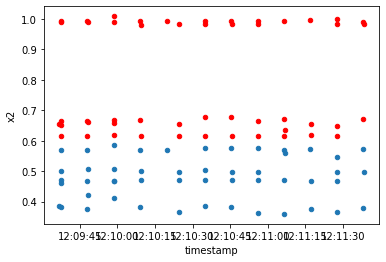

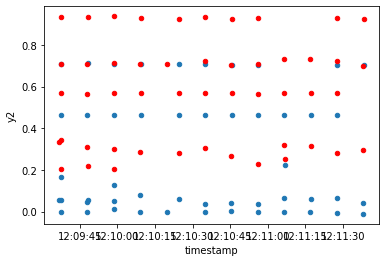

In [433]:
ax = dfunmod_time.plot.scatter(x='timestamp', y='x1')
dfunmod_time.plot.scatter(x='timestamp', y='x2', color='red', ax=ax)
ax2 = dfunmod_time.plot.scatter(x='timestamp', y='y1')
dfunmod_time.plot.scatter(x='timestamp', y='y2', color='red', ax=ax2)

Gaussian Model with 'transform'

<AxesSubplot:xlabel='timestamp', ylabel='y2'>

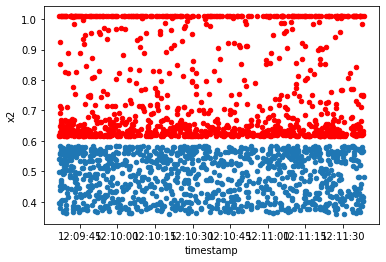

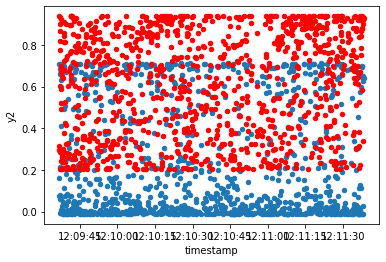

In [434]:
ax = GaussData_t.plot.scatter(x='timestamp', y='x1')
GaussData_t.plot.scatter(x='timestamp', y='x2', color='red', ax=ax)
ax2 = GaussData_t.plot.scatter(x='timestamp', y='y1')
GaussData_t.plot.scatter(x='timestamp', y='y2', color='red', ax=ax2)

TVAE model without 'reasonable' constraint

<AxesSubplot:xlabel='timestamp', ylabel='y2'>

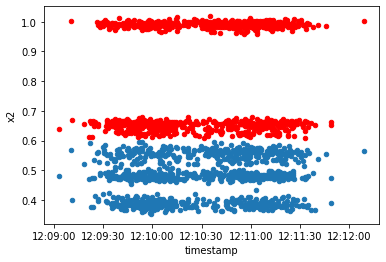

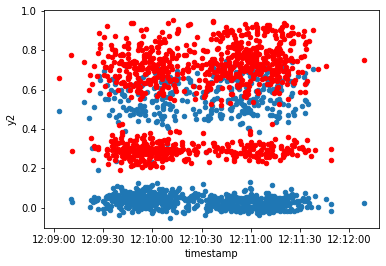

In [435]:
ax = tvaeData_t.plot.scatter(x='timestamp', y='x1')
tvaeData_t.plot.scatter(x='timestamp', y='x2', color='red', ax=ax)
ax2 = tvaeData_t.plot.scatter(x='timestamp', y='y1')
tvaeData_t.plot.scatter(x='timestamp', y='y2', color='red', ax=ax2)

#### Timestamps
The time range of the available data is too short to make any conclusion on the accuracy of the SDV models on timestamp distribution. However, it is clear timestamps are generated with each message in a similar date range. More data is required to evaluate how good these models are as a whole but it seems promising.

**NOTE** this model amplifies data, not extends time stamps to new dates

<AxesSubplot:xlabel='timestamp'>

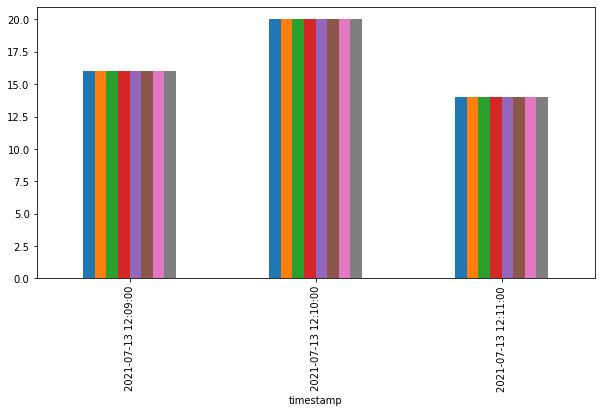

In [436]:
real_per_minute = dfunmod_time.groupby(
    [dfunmod_time['timestamp'].astype('datetime64[m]')]).count()
real_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='timestamp'>

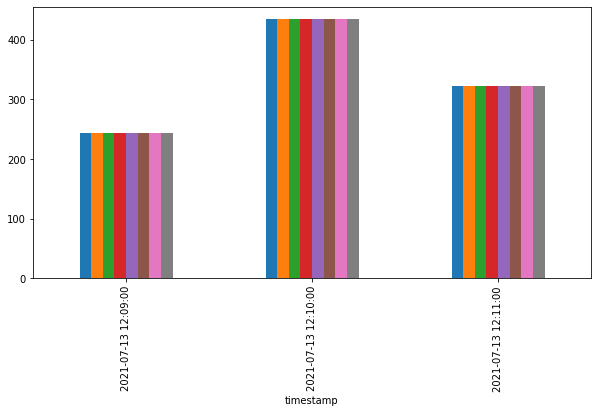

In [437]:
Gauss_per_minute = GaussData_t.groupby(
    [GaussData_t['timestamp'].astype('datetime64[m]')]).count()
Gauss_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='timestamp'>

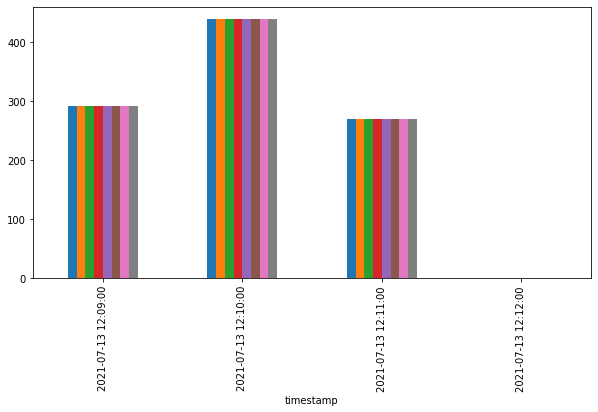

In [438]:
tvae_per_minute = tvaeData_t.groupby(
    [tvaeData_t['timestamp'].astype('datetime64[m]')]).count()
tvae_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

### Timeseries Par Model
Using SDV par model made specifically to generate timeseries data (PAR) powering it with the model which worked best to fit the model in general. Need far more data to understand what is going on and how to make it work the way we want it to/if it is currently doing what we'd want it to do.

In [439]:
from sdv.timeseries import PAR

In [498]:
model = PAR(sequence_index='timestamp', context_model=tvae_t, verbose = True, epochs = 500)
model.fit(dfunmod_time)

2021-07-30 11:53:47,316 : MainThread : INFO : Fitting table None metadata
2021-07-30 11:53:47,320 : MainThread : INFO : Anonymizing table None
2021-07-30 11:53:47,320 : MainThread : INFO : Fitting constraints for table None
2021-07-30 11:53:47,321 : MainThread : INFO : Fitting HyperTransformer for table None
2021-07-30 11:53:47,328 : MainThread : INFO : PARModel(epochs=500, sample_size=1, cuda='cpu', verbose=True) instance created


PARModel(epochs=500, sample_size=1, cuda='cpu', verbose=True) instance created


Epoch 500 | Loss 5.90355920791626: 100%|█████████████████████████████████████████████| 500/500 [00:11<00:00, 43.52it/s]


In [499]:
times = model.sample(num_sequences=100)
times.head()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.42it/s]


,sensors.__t,sensors.video.classes,sensors.video.scores,x1,y1,x2,y2,timestamp
0,c,person,0.655647,0.423299,0.197858,0.664446,0.275379,2021-07-13 12:09:36.857984000
1,c,couch,0.615333,0.568905,-0.061102,0.747960,0.463727,2021-07-13 12:09:37.296886016
2,c,tv,0.553128,0.500394,0.463920,0.838002,0.670293,2021-07-13 12:09:36.160031488
3,c,laptop,0.519562,0.500329,0.314929,0.703930,0.568349,2021-07-13 12:09:36.948231936
4,c,person,0.661660,0.483441,-0.182213,0.895938,0.570021,2021-07-13 12:09:39.006925056


<AxesSubplot:xlabel='timestamp'>

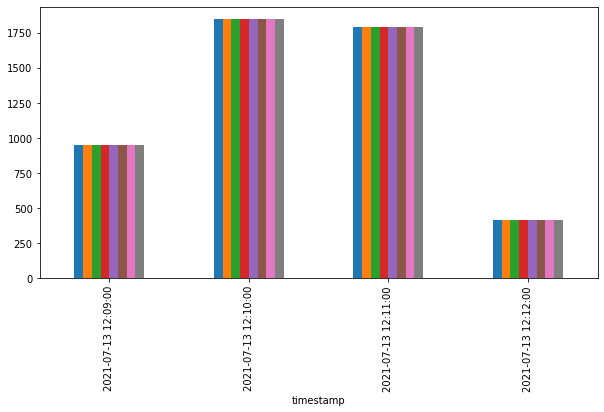

In [500]:
parmodel_per_minute = times.groupby(
    [times['timestamp'].astype('datetime64[m]')]).count()
parmodel_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

In [501]:
evaluate(
    times, dfunmod_time
)  # gets worse as timestamps get further away from initial 3 minutes which makes sense

0.5232330146141102

A possible reason for the behavior we are noticing is there is only one bell shaped pattern in this data. In general, timeseries machine learning models estimate the next step in the model. In this case, though we would like the shape to repeat as a sinusoidal shape, the logical next steps after 12:10 timestamp follow a curve converging to zero, so no matter how many sequences we request from the model, it will refuse to add data with timestamps exceeding 12:13. Changing the sequence length with elgonate the shape but not replicate it.

# Generating the entire dataset at once

## Preprocessing

### Handling boxes

#### Seperating messages

In [582]:
iothub = pd.read_json('./data/iotHubInput.json')

In [583]:
iothub.drop(columns='IoTHub', inplace=True)  # removing superfluous information
iothub[['type', 'video']] = pd.json_normalize(
    iothub['_unmodeleddata'])  # expanding to get unmodeleddata
iothub = iothub.explode(
    'video'
)  # exploding data on video duplicating each message to display info of each box
iothub[['boxes', 'classes',
        'scores']] = pd.json_normalize(iothub['video'])  # display boxes
iothub.drop(columns=['_unmodeleddata', 'video', 'PartitionId'],
            inplace=True)  # remove left over duplicates

iothub.head()

,_eventtype,_timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime,type,boxes,classes,scores
0,Telemetry,"07/26/2021, 16:00:47.627042",2021-07-26T14:25:45.6042582Z,2021-07-26T14:00:47.7180000Z,c,"[-0.0010495036840438843, 0.004458427429199219,...",couch,0.6328125
0,Telemetry,"07/26/2021, 16:00:47.627042",2021-07-26T14:25:45.6042582Z,2021-07-26T14:00:47.7180000Z,c,"[-0.0010495036840438843, 0.004458427429199219,...",couch,0.6328125
1,Telemetry,"07/26/2021, 16:00:37.352411",2021-07-26T14:25:45.6042582Z,2021-07-26T14:00:37.4730000Z,c,"[0.14544853568077087, -0.01586538553237915, 0....",bed,0.609375
1,Telemetry,"07/26/2021, 16:00:37.352411",2021-07-26T14:25:45.6042582Z,2021-07-26T14:00:37.4730000Z,c,"[0.14544853568077087, -0.01586538553237915, 0....",bed,0.609375
2,Telemetry,"07/26/2021, 16:00:27.090376",2021-07-26T14:25:45.6042582Z,2021-07-26T14:00:27.2340000Z,c,"[0.0025053471326828003, 0.0014475733041763306,...",couch,0.64453125


In [584]:
# Type casting
iothub['_timestamp'] = pd.to_datetime(iothub['_timestamp'], unit='ns')
iothub['EventProcessedUtcTime'] = pd.to_datetime(
    iothub['EventProcessedUtcTime'], unit='ns')
iothub['EventEnqueuedUtcTime'] = pd.to_datetime(iothub['EventEnqueuedUtcTime'],
                                                unit='ns')
iothub.scores = iothub.scores.astype('float')
iothub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   _eventtype             100 non-null    object             
 1   _timestamp             100 non-null    datetime64[ns]     
 2   EventProcessedUtcTime  100 non-null    datetime64[ns, UTC]
 3   EventEnqueuedUtcTime   100 non-null    datetime64[ns, UTC]
 4   type                   100 non-null    object             
 5   boxes                  100 non-null    object             
 6   classes                100 non-null    object             
 7   scores                 100 non-null    float64            
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), float64(1), object(4)
memory usage: 7.0+ KB


#### Flattening messages

In [585]:
pip install flatten_json

Note: you may need to restart the kernel to use updated packages.


In [586]:
from flatten_json import flatten, unflatten

In [587]:
# Opening JSON file
f = open('./data/iotHubInput.json', )

# returns JSON object as
# a dictionary
data = json.load(f)

# Flatten objects
x = [flatten(d) for d in data]

# create flat df
dfnorm = pd.DataFrame(x)

### Unformatting

In [588]:
def box_unformat(df, column, new_names):
    df[new_names] = df[column].str.split(',', expand=True) # split string in 4 columns
    df[new_names[0]] = df[new_names[0]].map(lambda x: x.lstrip('[')) # clean string to just have values
    df[new_names[3]] = df[new_names[3]].map(lambda x: x.rstrip(']'))
    df.drop(columns=column, inplace=True)# drop leftover column
    df[new_names[0]] = df[new_names[0]].astype(float)# Type casting
    df[new_names[1]] = df[new_names[1]].astype(float)
    df[new_names[2]] = df[new_names[2]].astype(float)
    df[new_names[3]] = df[new_names[3]].astype(float)
    return df

In [589]:
iothub = box_unformat(iothub, 'boxes',['x1', 'y1', 'x2',
        'y2'])

Could be put in for loop for multiple boxes

In [590]:
dfnorm = box_unformat(dfnorm, '_unmodeleddata_sensors_video_0_boxes',
                      ['x1.1', 'y1.1', 'x2.1', 'y2.1'])
dfnorm = box_unformat(dfnorm, '_unmodeleddata_sensors_video_1_boxes',
                      ['x1.2', 'y1.2', 'x2.2', 'y2.2'])

In [591]:
# names of the columns are changed here for reading pleasure, however,
# they must be retained and not changed in order to unflatten!
dfnorm.rename(
    columns={
        '_unmodeleddata_sensors___t': 'sensor_type',
        '_unmodeleddata_sensors_video_0_classes': 'classes.1',
        '_unmodeleddata_sensors_video_0_scores': 'scores.1',
        '_unmodeleddata_sensors_video_1_classes': 'classes.2',
        '_unmodeleddata_sensors_video_1_scores': 'scores.2'
    },inplace=True)
# Removing superfluous columns
dfnorm.drop(columns=[
    '_eventtype', 'PartitionId', 'IoTHub_MessageId', 'IoTHub_CorrelationId',
    'IoTHub_ConnectionDeviceId', 'IoTHub_ConnectionDeviceGenerationId',
    'IoTHub_EnqueuedTime', 'IoTHub_StreamId'
],
            inplace=True)

In [592]:
# Type casting
dfnorm['_timestamp'] = pd.to_datetime(dfnorm['_timestamp'], unit='ns')
dfnorm['EventProcessedUtcTime'] = pd.to_datetime(
    dfnorm['EventProcessedUtcTime'], unit='ns')
dfnorm['EventEnqueuedUtcTime'] = pd.to_datetime(dfnorm['EventEnqueuedUtcTime'],
                                                unit='ns')
dfnorm['scores.1'] = dfnorm['scores.1'].astype('float')
dfnorm['scores.2'] = dfnorm['scores.2'].astype('float')

## Fitting and evaluating for seperated messages

In [593]:
x_constraint = GreaterThan(low='x1',
                           high='x2',
                           handling_strategy='reject_sampling')

y_constraint = GreaterThan(low='y1',
                           high='y2',
                           handling_strategy='reject_sampling')

constraints_tvae_iot = [x_constraint, y_constraint]

reasonable_x1 = Between(column='x1',
                        low=min(iothub.x1),
                        high=max(iothub.x1),
                        handling_strategy='transform')

reasonable_y1 = Between(column='y1',
                        low=min(iothub.y1),
                        high=max(iothub.y1),
                        handling_strategy='transform')

reasonable_x2 = Between(column='x2',
                        low=min(iothub.x2),
                        high=max(iothub.x2),
                        handling_strategy='transform')

reasonable_y2 = Between(column='y2',
                        low=min(iothub.y2),
                        high=max(iothub.y2),
                        handling_strategy='transform')

constraints_copula_iot = [
    x_constraint, y_constraint, reasonable_x1, reasonable_y1, reasonable_x2,
    reasonable_y2
]

reasonable_x1 = Between(column='x1',
                        low=min(iothub.x1),
                        high=max(iothub.x1),
                        handling_strategy='reject_sampling')

reasonable_y1 = Between(column='y1',
                        low=min(iothub.y1),
                        high=max(iothub.y1),
                        handling_strategy='reject_sampling')

reasonable_x2 = Between(column='x2',
                        low=min(iothub.x2),
                        high=max(iothub.x2),
                        handling_strategy='reject_sampling')

reasonable_y2 = Between(column='y2',
                        low=min(iothub.y2),
                        high=max(iothub.y2),
                        handling_strategy='reject_sampling')

constraints_ctgan_iot = [
    x_constraint, y_constraint, reasonable_x1, reasonable_y1, reasonable_x2,
    reasonable_y2
]

field_transformer_n = {
    '_timestamp': 'datetime',
    'EventProcessedUtcTime': 'datetime',
    'EventEnqueuedUtcTime': 'datetime',
    'type': 'categorical',
    'classes': 'categorical',
    'scores': 'float',
    'x1': 'float',
    'y1': 'float',
    'x2': 'float',
    'y2': 'float'
}

Could add a UniqueCombination constraint for EventProcessed time and EventEnqueued time if appropriate

### Gaussian

In [594]:
gaussian_new = GaussianCopula(constraints=constraints_copula_iot,
                              field_transformers=field_transformer_n)
gaussian_new.fit(iothub)

2021-07-30 13:24:01,688 : MainThread : INFO : Fitting table None metadata
2021-07-30 13:24:01,692 : MainThread : INFO : Anonymizing table None
2021-07-30 13:24:01,694 : MainThread : INFO : Fitting constraints for table None
2021-07-30 13:24:01,699 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:24:02,292 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:24:02,860 : MainThread : INFO : Fitting HyperTransformer for table None
2021-07-30 13:24:02,894 : MainThread : INFO : Fitting GaussianMultivariate(distribution="{'_timestamp': Univariate, 'EventProcessedUtcTime': Univariate, 'EventEnqueuedUtcTime': Univariate, 'type': Univariate, 'classes': Univariate, 'scores': Univariate, 'x1#-0.0010495036840438843#0.14544853568077087': Univariate, 'y1#-0.023361951112747192#0.004458427429199219': Univariate, 'x2#0.35019147396087646#0.9748222827911377': Univariate, 'y2#0.3392622470855713#0.99464350938797': Univariate, '_eventtype#0': Univariate}")


In [595]:
New_Gauss = gaussian_new.sample(100)
New_Gauss.head()

,_eventtype,_timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime,type,classes,scores,x1,y1,x2,y2
0,Telemetry,2021-07-26 15:57:08.847493632,2021-07-26 14:25:43.133964288+00:00,2021-07-26 13:57:09.089084928+00:00,c,couch,0.626033,-0.000157,0.004325,0.350493,0.339270
1,Telemetry,2021-07-26 15:54:12.842832128,2021-07-26 14:25:43.283615232+00:00,2021-07-26 13:54:12.768658176+00:00,c,bed,0.617158,0.145449,-0.022942,0.974822,0.994644
2,Telemetry,2021-07-26 15:57:44.596356864,2021-07-26 14:25:44.214538496+00:00,2021-07-26 13:57:44.769528064+00:00,c,couch,0.595566,0.144922,-0.004335,0.358117,0.339487
3,Telemetry,2021-07-26 15:53:26.510683648,2021-07-26 14:25:41.788369920+00:00,2021-07-26 13:53:26.766356480+00:00,c,bed,0.609123,0.145448,-0.013132,0.606957,0.455826
4,Telemetry,2021-07-26 15:52:56.175624960,2021-07-26 14:25:42.386213632+00:00,2021-07-26 13:52:56.473943552+00:00,c,couch,0.618308,0.128299,-0.013391,0.359225,0.351074


In [596]:
evaluate(New_Gauss, iothub)

0.42109971876798

In [597]:
evaluate(New_Gauss[['type', 'classes', 'scores', 'x1', 'y1', 'x2', 'y2']],
         iothub[['type', 'classes', 'scores', 'x1', 'y1', 'x2', 'y2']])

0.5923589902130613

### TVAE

In [624]:
tvae_n = TVAE(constraints=constraints_tvae_iot,
              field_transformers=field_transformer_n)
tvae_n.fit(iothub)

2021-07-30 13:31:18,521 : MainThread : INFO : Fitting table None metadata
2021-07-30 13:31:18,525 : MainThread : INFO : Anonymizing table None
2021-07-30 13:31:18,525 : MainThread : INFO : Fitting constraints for table None
2021-07-30 13:31:18,529 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:19,106 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:19,552 : MainThread : INFO : Fitting HyperTransformer for table None


In [625]:
New_tvae = tvae_n.sample(100)
New_tvae.head()

,_eventtype,_timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime,type,classes,scores,x1,y1,x2,y2
0,Telemetry,2021-07-26 16:00:41.580692736,2021-07-26 14:25:42.167000576+00:00,2021-07-26 13:59:34.849066496+00:00,c,bed,0.601618,0.140233,-0.016011,0.956609,0.989162
1,Telemetry,2021-07-26 15:58:31.200839680,2021-07-26 14:25:45.104192768+00:00,2021-07-26 13:58:08.804318464+00:00,c,couch,0.641306,0.007367,0.002507,0.356874,0.341680
2,Telemetry,2021-07-26 16:00:25.968082176,2021-07-26 14:25:42.144242944+00:00,2021-07-26 13:58:10.421652480+00:00,c,couch,0.581699,0.001157,0.000171,0.358162,0.347976
3,Telemetry,2021-07-26 15:53:23.523060224,2021-07-26 14:25:41.909849856+00:00,2021-07-26 13:58:05.991798016+00:00,c,couch,0.628409,0.010561,0.002600,0.347590,0.340163
4,Telemetry,2021-07-26 15:52:59.950399744,2021-07-26 14:25:42.340688384+00:00,2021-07-26 13:53:14.386142208+00:00,c,bed,0.607467,0.139373,-0.012208,0.955375,0.993902


In [626]:
evaluate(New_tvae, iothub)

0.45088453180383403

In [627]:
evaluate(New_tvae[['type', 'classes', 'scores', 'x1', 'y1', 'x2', 'y2']],
         iothub[['type', 'classes', 'scores', 'x1', 'y1', 'x2', 'y2']])

0.7046580010042708

<AxesSubplot:xlabel='_timestamp'>

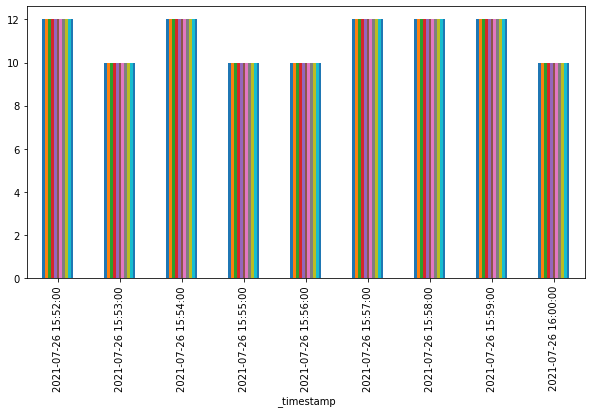

In [602]:
iothub_per_minute = iothub.groupby(
    [iothub['_timestamp'].astype('datetime64[m]')]).count()
iothub_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='_timestamp'>

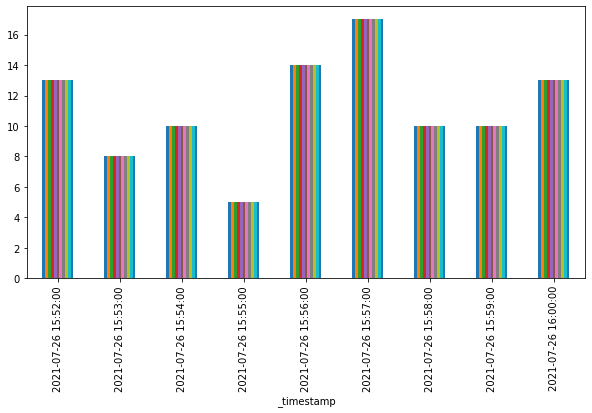

In [603]:
newgauss_per_minute = New_Gauss.groupby(
    [New_Gauss['_timestamp'].astype('datetime64[m]')]).count()
newgauss_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='_timestamp'>

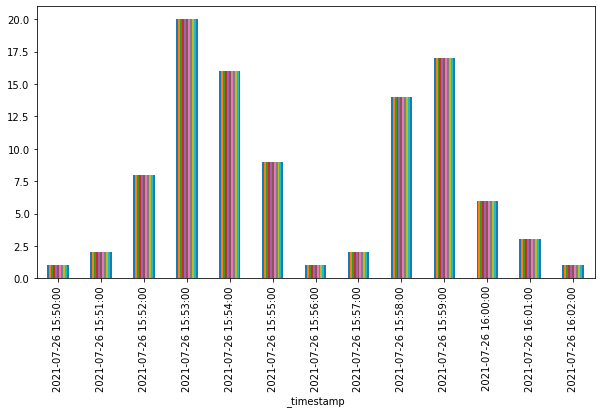

In [604]:
newtvae_per_minute = New_tvae.groupby(
    [New_tvae['_timestamp'].astype('datetime64[m]')]).count()
newtvae_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

## Fitting and evaluating for flattened messages

In [605]:
x_constraint1 = GreaterThan(low='x1.1',
                            high='x2.1',
                            handling_strategy='reject_sampling')

y_constraint1 = GreaterThan(low='y1.1',
                            high='y2.1',
                            handling_strategy='reject_sampling')

x_constraint2 = GreaterThan(low='x1.2',
                            high='x2.2',
                            handling_strategy='reject_sampling')

y_constraint2 = GreaterThan(low='y1.2',
                            high='y2.2',
                            handling_strategy='reject_sampling')

constraints_tvae_flat = [
    x_constraint1, y_constraint1, x_constraint2, y_constraint2
]

reasonable1_x1 = Between(column='x1.1',
                         low=min(dfnorm['x1.1']),
                         high=max(dfnorm['x1.1']),
                         handling_strategy='transform')

reasonable1_y1 = Between(column='y1.1',
                         low=min(dfnorm['y1.1']),
                         high=max(dfnorm['y1.1']),
                         handling_strategy='transform')

reasonable1_x2 = Between(column='x2.1',
                         low=min(dfnorm['x2.1']),
                         high=max(dfnorm['x2.1']),
                         handling_strategy='transform')

reasonable1_y2 = Between(column='y2.1',
                         low=min(dfnorm['y2.1']),
                         high=max(dfnorm['y2.1']),
                         handling_strategy='transform')

reasonable2_x1 = Between(column='x1.2',
                         low=min(dfnorm['x1.2']),
                         high=max(dfnorm['x1.2']),
                         handling_strategy='transform')

reasonable2_y1 = Between(column='y1.2',
                         low=min(dfnorm['y1.2']),
                         high=max(dfnorm['y1.2']),
                         handling_strategy='transform')

reasonable2_x2 = Between(column='x2.2',
                         low=min(dfnorm['x2.2']),
                         high=max(dfnorm['x2.2']),
                         handling_strategy='transform')

reasonable2_y2 = Between(column='y2.2',
                         low=min(dfnorm['y2.2']),
                         high=max(dfnorm['y2.2']),
                         handling_strategy='transform')

constraints_copula_flat = [
    x_constraint1, y_constraint1, reasonable1_x1, reasonable1_y1,
    reasonable1_x2, reasonable1_y2, reasonable2_x1, reasonable2_y1,
    reasonable2_x2, reasonable2_y2
]

reasonable1_x1 = Between(column='x1.1',
                         low=min(dfnorm['x1.1']),
                         high=max(dfnorm['x1.1']),
                         handling_strategy='reject_sampling')

reasonable1_y1 = Between(column='y1.1',
                         low=min(dfnorm['y1.1']),
                         high=max(dfnorm['y1.1']),
                         handling_strategy='reject_sampling')

reasonable1_x2 = Between(column='x2.1',
                         low=min(dfnorm['x2.1']),
                         high=max(dfnorm['x2.1']),
                         handling_strategy='reject_sampling')

reasonable1_y2 = Between(column='y2.1',
                         low=min(dfnorm['y2.1']),
                         high=max(dfnorm['y2.1']),
                         handling_strategy='reject_sampling')

reasonable2_x1 = Between(column='x1.2',
                         low=min(dfnorm['x1.2']),
                         high=max(dfnorm['x1.2']),
                         handling_strategy='reject_sampling')

reasonable2_y1 = Between(column='y1.2',
                         low=min(dfnorm['y1.2']),
                         high=max(dfnorm['y1.2']),
                         handling_strategy='reject_sampling')

reasonable2_x2 = Between(column='x2.2',
                         low=min(dfnorm['x2.2']),
                         high=max(dfnorm['x2.2']),
                         handling_strategy='reject_sampling')

reasonable2_y2 = Between(column='y2.2',
                         low=min(dfnorm['y2.2']),
                         high=max(dfnorm['y2.2']),
                         handling_strategy='reject_sampling')

constraints_ctgan_flat = [
    x_constraint, y_constraint, reasonable1_x1, reasonable1_y1, reasonable1_x2,
    reasonable1_y2, reasonable2_x1, reasonable2_y1, reasonable2_x2,
    reasonable2_y2
]

field_transformer_flat = {
    '_timestamp': 'datetime',
    'EventProcessedUtcTime': 'datetime',
    'EventEnqueuedUtcTime': 'datetime',
    'sensor_type': 'categorical',
    'classes.1': 'categorical',
    'scores.1': 'float',
    'classes.2': 'categorical',
    'scores.2': 'float',
    'x1.1': 'float',
    'y1.1': 'float',
    'x2.1': 'float',
    'y2.1': 'float',
    'x1.2': 'float',
    'y1.2': 'float',
    'x2.2': 'float',
    'y2.2': 'float'
}

field_distribution_b = {
    'scores.1': 'student_t',
    'scores.2': 'student_t',
    'x1.1': 'student_t',
    'y1.1': 'student_t',
    'x2.1': 'student_t',
    'y2.1': 'student_t',
    'x1.2': 'student_t',
    'y1.2': 'student_t',
    'x2.2': 'student_t',
    'y2.2': 'student_t'
}

### Gaussian

In [606]:
gaussian_flat = GaussianCopula(constraints=constraints_copula_flat,
                               field_transformers=field_transformer_flat,
                               field_distributions=field_distribution_b)
gaussian_flat.fit(dfnorm)

2021-07-30 13:24:17,932 : MainThread : INFO : Fitting table None metadata
2021-07-30 13:24:17,936 : MainThread : INFO : Anonymizing table None
2021-07-30 13:24:17,938 : MainThread : INFO : Fitting constraints for table None
2021-07-30 13:24:17,943 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:24:18,633 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:24:19,283 : MainThread : INFO : Fitting HyperTransformer for table None
2021-07-30 13:24:19,339 : MainThread : INFO : Fitting GaussianMultivariate(distribution="{'scores.1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'scores.2': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'x1.1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'y1.1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'x2.1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'y2.1': <class 'copulas.univariate.student_t.StudentTUnivariate'>, 'x1.2': <class 'copulas.univariate.s

In [607]:
flat_gauss = gaussian_flat.sample(1000)
flat_gauss.head()

,sensor_type,classes.1,scores.1,classes.2,scores.2,_timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime,x1.1,y1.1,x2.1,y2.1,x1.2,y1.2,x2.2,y2.2
0,c,couch,0.620609,bed,0.589180,2021-07-26 15:52:34.380059392,2021-07-26 14:25:41.555853824+00:00,2021-07-26 13:52:34.658715648+00:00,0.001898,0.004184,0.350797,0.342362,0.117696,-0.020693,0.971431,0.977668
1,c,couch,0.640861,bed,0.576292,2021-07-26 15:57:34.165053696,2021-07-26 14:25:44.106543872+00:00,2021-07-26 13:57:34.481298944+00:00,0.000676,0.003140,0.353497,0.343954,0.112959,-0.018638,0.971901,0.988880
2,c,couch,0.639630,bed,0.596940,2021-07-26 15:56:54.446614272,2021-07-26 14:25:42.608930048+00:00,2021-07-26 13:56:54.554129152+00:00,0.000889,0.005631,0.350191,0.342709,0.129117,-0.005102,0.963427,0.945516
3,c,couch,0.623207,bed,0.587850,2021-07-26 15:56:55.153115904,2021-07-26 14:25:43.745181696+00:00,2021-07-26 13:56:55.565349120+00:00,0.002081,0.002923,0.352494,0.345076,0.129886,-0.005647,0.971313,0.927423
4,c,couch,0.635144,bed,0.602090,2021-07-26 15:55:21.054443008,2021-07-26 14:25:45.041535488+00:00,2021-07-26 13:55:21.570001408+00:00,0.001739,0.001508,0.354220,0.348779,0.140735,-0.008463,0.973189,0.985021


In [608]:
evaluate(flat_gauss, dfnorm)

0.4890378467856606

In [609]:
evaluate(
    flat_gauss[[
        'sensor_type', 'classes.1', 'scores.1', 'x1.1', 'y1.1', 'x2.1', 'y2.1',
        'classes.2', 'scores.2', 'x1.2', 'y1.2', 'x2.2', 'y2.2'
    ]], dfnorm[[
        'sensor_type', 'classes.1', 'scores.1', 'x1.1', 'y1.1', 'x2.1', 'y2.1',
        'classes.2', 'scores.2', 'x1.2', 'y1.2', 'x2.2', 'y2.2'
    ]])

0.6295263965523387

### TVAE

In [628]:
tvae_flat = TVAE(constraints=constraints_tvae_flat,
                 field_transformers=field_transformer_flat)
tvae_flat.fit(dfnorm)

2021-07-30 13:31:41,311 : MainThread : INFO : Fitting table None metadata
2021-07-30 13:31:41,315 : MainThread : INFO : Anonymizing table None
2021-07-30 13:31:41,316 : MainThread : INFO : Fitting constraints for table None
2021-07-30 13:31:41,321 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:42,010 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:42,472 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:43,061 : MainThread : INFO : Fitting GaussianMultivariate()
2021-07-30 13:31:43,527 : MainThread : INFO : Fitting HyperTransformer for table None


In [629]:
flat_tvae = tvae_flat.sample(1000)
flat_tvae.head()

,sensor_type,classes.1,scores.1,classes.2,scores.2,_timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime,x1.1,y1.1,x2.1,y2.1,x1.2,y1.2,x2.2,y2.2
0,c,couch,0.646113,bed,0.597658,2021-07-26 15:58:49.338031872,2021-07-26 14:25:44.273220352+00:00,2021-07-26 13:58:56.457265920+00:00,-0.001006,0.005059,0.352888,0.339633,0.127167,-0.016045,0.971706,0.991878
1,c,couch,0.641969,bed,0.598135,2021-07-26 15:55:42.517068288,2021-07-26 14:25:43.905486592+00:00,2021-07-26 13:53:16.884683264+00:00,-0.000169,0.002615,0.353784,0.348689,0.136303,-0.015706,0.970270,0.996083
2,c,couch,0.650690,bed,0.597533,2021-07-26 15:59:09.008641024,2021-07-26 14:25:45.371668992+00:00,2021-07-26 14:01:03.595997696+00:00,-0.000647,0.003110,0.358499,0.345358,0.131563,-0.015831,0.970339,0.995627
3,c,couch,0.623613,bed,0.597870,2021-07-26 15:57:46.407924480,2021-07-26 14:25:45.194522624+00:00,2021-07-26 13:57:03.534027264+00:00,-0.005003,0.002232,0.357283,0.332722,0.131285,-0.015732,0.973851,0.993085
4,c,couch,0.641039,bed,0.597149,2021-07-26 15:58:49.361882112,2021-07-26 14:25:45.256910592+00:00,2021-07-26 13:58:37.934870272+00:00,-0.003606,0.003984,0.354789,0.347581,0.137156,-0.016018,0.966769,0.995648


In [630]:
evaluate(flat_tvae, dfnorm)

0.6566262677125312

In [631]:
evaluate(
    flat_tvae[[
        'sensor_type', 'classes.1', 'scores.1', 'x1.1', 'y1.1', 'x2.1', 'y2.1',
        'classes.2', 'scores.2', 'x1.2', 'y1.2', 'x2.2', 'y2.2'
    ]], dfnorm[[
        'sensor_type', 'classes.1', 'scores.1', 'x1.1', 'y1.1', 'x2.1', 'y2.1',
        'classes.2', 'scores.2', 'x1.2', 'y1.2', 'x2.2', 'y2.2'
    ]])

0.8241236037337645

## Visualizing

### Timestamp Distribution

<AxesSubplot:xlabel='_timestamp'>

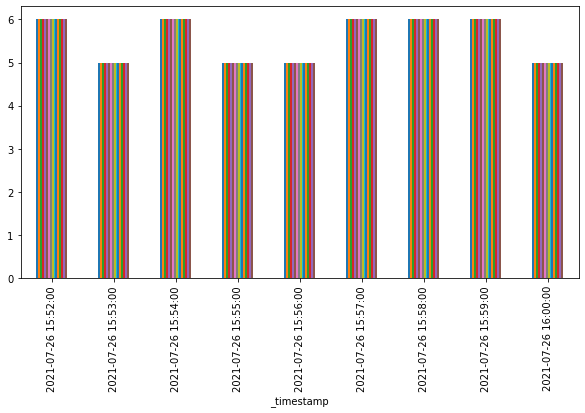

In [614]:
dfnorm_per_minute = dfnorm.groupby(
    [dfnorm['_timestamp'].astype('datetime64[m]')]).count()
dfnorm_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='_timestamp'>

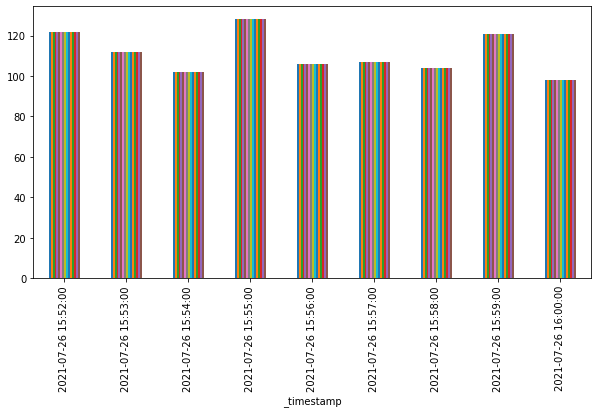

In [615]:
flat_gauss_per_minute = flat_gauss.groupby(
    [flat_gauss['_timestamp'].astype('datetime64[m]')]).count()
flat_gauss_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

<AxesSubplot:xlabel='_timestamp'>

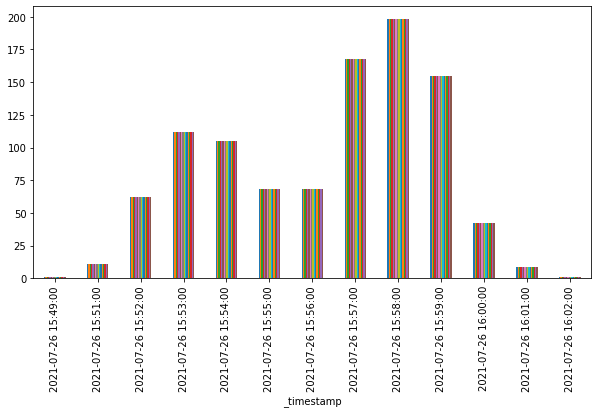

In [616]:
flat_tvae_per_minute = flat_tvae.groupby(
    [flat_tvae['_timestamp'].astype('datetime64[m]')]).count()
flat_tvae_per_minute.plot(kind='bar', figsize=(10, 5), legend=None)

### Box Coords

<AxesSubplot:xlabel='_timestamp', ylabel='y2.2'>

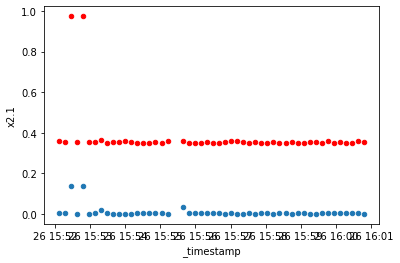

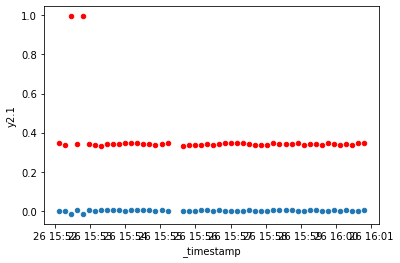

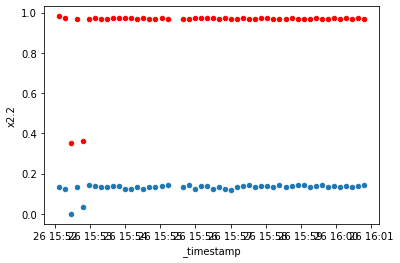

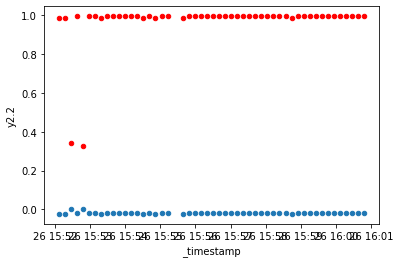

In [617]:
ax = dfnorm.plot.scatter(x='_timestamp', y='x1.1')
dfnorm.plot.scatter(x='_timestamp', y='x2.1', color='red', ax=ax)
ax2 = dfnorm.plot.scatter(x='_timestamp', y='y1.1')
dfnorm.plot.scatter(x='_timestamp', y='y2.1', color='red', ax=ax2)
ax = dfnorm.plot.scatter(x='_timestamp', y='x1.2')
dfnorm.plot.scatter(x='_timestamp', y='x2.2', color='red', ax=ax)
ax2 = dfnorm.plot.scatter(x='_timestamp', y='y1.2')
dfnorm.plot.scatter(x='_timestamp', y='y2.2', color='red', ax=ax2)

<AxesSubplot:xlabel='_timestamp', ylabel='y2.2'>

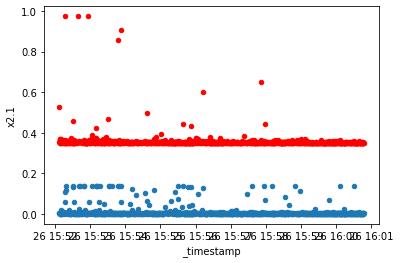

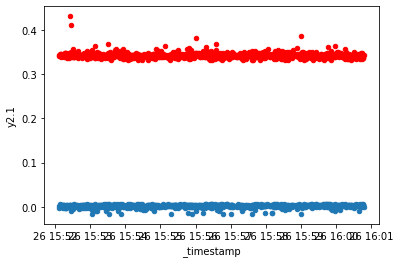

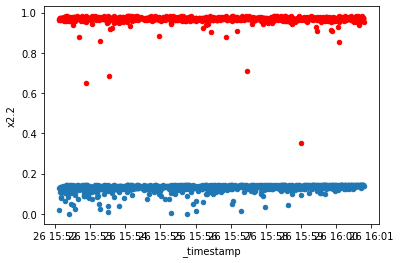

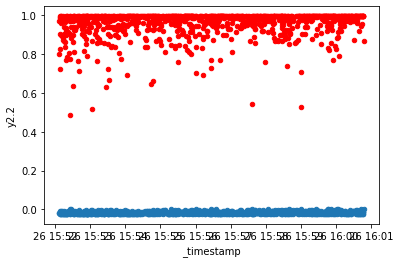

In [618]:
ax = flat_gauss.plot.scatter(x='_timestamp', y='x1.1')
flat_gauss.plot.scatter(x='_timestamp', y='x2.1', color='red', ax=ax)
ax2 = flat_gauss.plot.scatter(x='_timestamp', y='y1.1')
flat_gauss.plot.scatter(x='_timestamp', y='y2.1', color='red', ax=ax2)
ax3 = flat_gauss.plot.scatter(x='_timestamp', y='x1.2')
flat_gauss.plot.scatter(x='_timestamp', y='x2.2', color='red', ax=ax3)
ax4 = flat_gauss.plot.scatter(x='_timestamp', y='y1.2')
flat_gauss.plot.scatter(x='_timestamp', y='y2.2', color='red', ax=ax4)

<AxesSubplot:xlabel='_timestamp', ylabel='y2.2'>

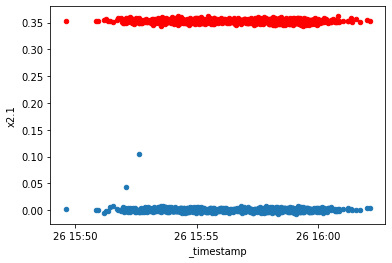

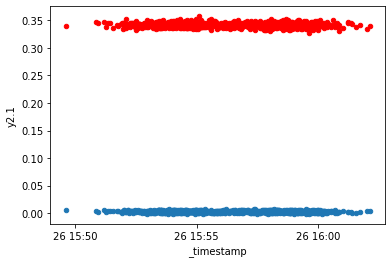

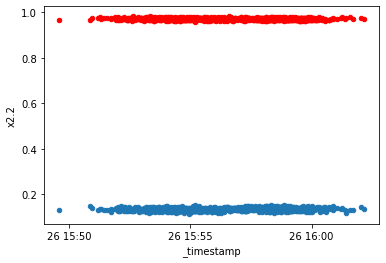

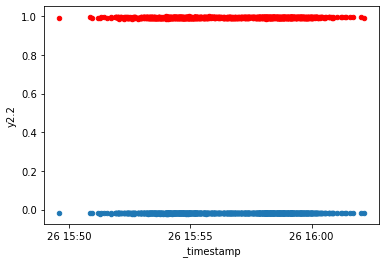

In [632]:
ax = flat_tvae.plot.scatter(x='_timestamp', y='x1.1')
flat_tvae.plot.scatter(x='_timestamp', y='x2.1', color='red', ax=ax)
ax2 = flat_tvae.plot.scatter(x='_timestamp', y='y1.1')
flat_tvae.plot.scatter(x='_timestamp', y='y2.1', color='red', ax=ax2)
ax3 = flat_tvae.plot.scatter(x='_timestamp', y='x1.2')
flat_tvae.plot.scatter(x='_timestamp', y='x2.2', color='red', ax=ax3)
ax4 = flat_tvae.plot.scatter(x='_timestamp', y='y1.2')
flat_tvae.plot.scatter(x='_timestamp', y='y2.2', color='red', ax=ax4)

## Reformatting

In [620]:
flat_tvae.rename(
    columns={
        'sensor_type' :'unmodeleddata_sensors___t' ,
        'classes.1':'unmodeleddata_sensors_video_0_classes',
        'scores.1': 'unmodeleddata_sensors_video_0_scores' ,
        'classes.2': 'unmodeleddata_sensors_video_1_classes' ,
        'scores.2': 'unmodeleddata_sensors_video_1_scores',
        '_timestamp':'timestamp'
    },inplace=True)

In [621]:
temp = []
fromat_tvae = flat_tvae.copy()
for i in range(len(flat_tvae['x1.1'].tolist())):
        temp.append('[' + str(flat_tvae['x1.1'].tolist()[i]) + ', ' +
                    str(flat_tvae['y1.1'].tolist()[i]) + ', ' + str(flat_tvae['x2.1'].tolist()[i]) +
                    ', ' + str(flat_tvae['y2.1'].tolist()[i]) + ']')
fromat_tvae.drop(columns=['x1.1', 'y1.1', 'x2.1', 'y2.1'], inplace=True)
fromat_tvae.insert(2, 'unmodeleddata_sensors_video_0_boxes', temp)


In [622]:
temp = []
for i in range(len(flat_tvae['x1.2'].tolist())):
        temp.append('[' + str(flat_tvae['x1.2'].tolist()[i]) + ', ' +
                    str(flat_tvae['y1.2'].tolist()[i]) + ', ' + str(flat_tvae['x2.2'].tolist()[i]) +
                    ', ' + str(flat_tvae['y2.2'].tolist()[i]) + ']')
fromat_tvae.drop(columns=['x1.2', 'y1.2', 'x2.2', 'y2.2'], inplace=True)
fromat_tvae.insert(5, 'unmodeleddata_sensors_video_1_boxes', temp)

In [623]:
fromat_tvae.head()

,unmodeleddata_sensors___t,unmodeleddata_sensors_video_0_classes,unmodeleddata_sensors_video_0_boxes,unmodeleddata_sensors_video_0_scores,unmodeleddata_sensors_video_1_classes,unmodeleddata_sensors_video_1_boxes,unmodeleddata_sensors_video_1_scores,timestamp,EventProcessedUtcTime,EventEnqueuedUtcTime
0,c,couch,"[-1.839478905271935e-05, -0.000182507112502373...",0.638004,bed,"[0.12371916899101872, -0.01625735550464828, 0....",0.584492,2021-07-26 15:57:33.086019328,2021-07-26 14:25:43.090420224+00:00,2021-07-26 13:53:55.974961152+00:00
1,c,couch,"[0.00034271171163531187, 0.002936470398407392,...",0.619582,bed,"[0.13580249495439978, -0.016122086643799983, 0...",0.597373,2021-07-26 15:54:02.759121408,2021-07-26 14:25:41.879738880+00:00,2021-07-26 13:52:57.259563008+00:00
2,c,couch,"[0.00017669096650499742, 0.0022713111262510173...",0.638033,bed,"[0.12053934294468518, -0.02218225115854493, 0....",0.597456,2021-07-26 15:53:48.756245248,2021-07-26 14:25:42.837284608+00:00,2021-07-26 13:52:45.252415744+00:00
3,c,couch,"[0.0010364368529711798, 0.0032372070348017476,...",0.630229,bed,"[0.12918293854551907, -0.015684933910622215, 0...",0.597179,2021-07-26 15:58:34.011042560,2021-07-26 14:25:44.728321792+00:00,2021-07-26 13:58:57.069963008+00:00
4,c,couch,"[-0.0023364385665699313, 0.0014842892490229843...",0.636010,bed,"[0.13789985516647696, -0.015825587263260412, 0...",0.596960,2021-07-26 15:57:15.385118720,2021-07-26 14:25:44.934795520+00:00,2021-07-26 13:58:25.445385984+00:00
